## Get the data

In [1]:
import sqlalchemy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import qstools as qs
import math

import warnings
warnings.simplefilter('ignore')

In [2]:
from_DB = True
path_to_feather = "..//..//data//feathers//" 

cids = ['AUD', 'BRL', 'CAD', 'CHF', 'CLP', 'CNY', 'COP', 'EUR', 'GBP', 'HUF', 'IDR', 'INR', 'JPY', 
        'KRW', 'MYR', 'MXN', 'NOK', 'NZD', 'PEN', 'PHP', 'PLN', 'RON', 'RUB', 'SEK', 'SGD', 'THB', 
        'TRY', 'TWD', 'USD', 'ZAR']
cats = ['CPIH', 'CPIC']

if from_DB:
    dbi = qs.interfaces.DbIndicatorsInterface(username="rsueppel", host="qs-db.cpdsgdta9z0z.eu-west-2.rds.amazonaws.com",
                                              password="l3oT7^WerjY#O!9EGqvL", database="qs_jpm_point_time")
    dfm = dbi.get_series_values(category=cats, cross_section=cids, frequency="m")  # import grade 1 vintages
    dfm.to_feather(f'{path_to_feather}dfm_cpi.tr')
else:
    dfm = pd.read_feather(f'{path_to_feather}dfm_cpi.tr')

In [3]:
dfm['transformation'].isnull().all()  # check that all transformations are None

True

In [4]:
dfm['xcat'] = dfm['category_code'] + '_' + dfm['adjustment']  # extended category
dfm['ticker'] = dfm['cross_section'] + '_' + dfm['xcat']  # ticker (if nor transformation)

In [5]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005815 entries, 0 to 5005814
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   cross_section     object 
 1   category_code     object 
 2   adjustment        object 
 3   transformation    object 
 4   release_date      object 
 5   observation_date  object 
 6   value             float64
 7   grading           object 
 8   xcat              object 
 9   ticker            object 
dtypes: float64(1), object(9)
memory usage: 381.9+ MB


In [6]:
dfm.xcat.unique()

array(['CPIC_NSA', 'CPIC_SA', 'CPIH_SA', 'CPIH_NSA'], dtype=object)

## Data availability

In [7]:
def countmap(xcat, start_year, figsize=(12, 12), trueVin = False):
    dfx = dfm[dfm['xcat']==xcat]
    if trueVin:
        dfx = dfx[dfx['grading'].isin(['1', '1.0', '2.2'])]
    xids = cids # np.sort(dfx['cross_section'].unique())
    dfx.loc[:, 'year'] = pd.DatetimeIndex(dfx.loc[:,'release_date']).year
    dfx = dfx[dfx.year >= start_year]

    dfxx = pd.DataFrame(columns=dfx.columns)
    for cid in xids:
        dfc = dfx.query('cross_section == @cid').reset_index(drop=True)
        releases = dfc[["year", "release_date"]].groupby("year")["release_date"].max().values.tolist()  # use panda series!
        dfcx = dfc[dfc['release_date'].isin(releases)]
        dfxx = dfxx.append(dfcx)

    count_matrix = pd.crosstab(dfxx["year"], dfxx["cross_section"])  # per default crosstab counts rows
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(count_matrix, annot=True, fmt="d",
                    cmap="YlGnBu", cbar=False, linewidths=.5)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(xcat + ': Vintage lengths for last (available) release in year ', y = 1.1, fontsize=14)

### Availability of CPIH_NSA 

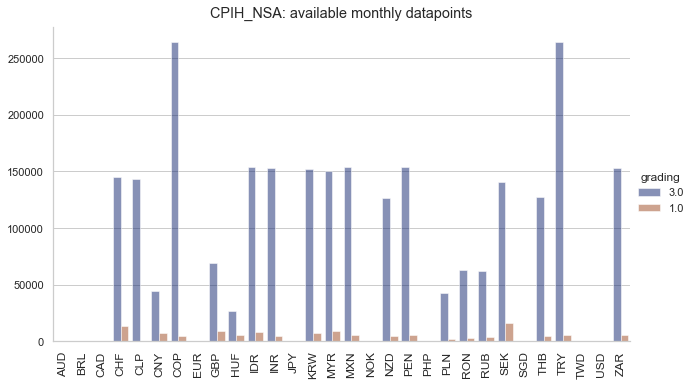

In [8]:
xcat = 'CPIH_NSA'
sns.set_theme(style='whitegrid')
g = sns.catplot(data=dfm[dfm['xcat']==xcat], kind='count', order=cids, 
                x='cross_section', palette='dark', aspect=1.8, alpha=0.5, hue='grading')
g.set_xticklabels(rotation=90, size=12)
g.fig.suptitle(f'{xcat}: available monthly datapoints', y=1.02)
plt.xlabel('')
plt.ylabel('')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

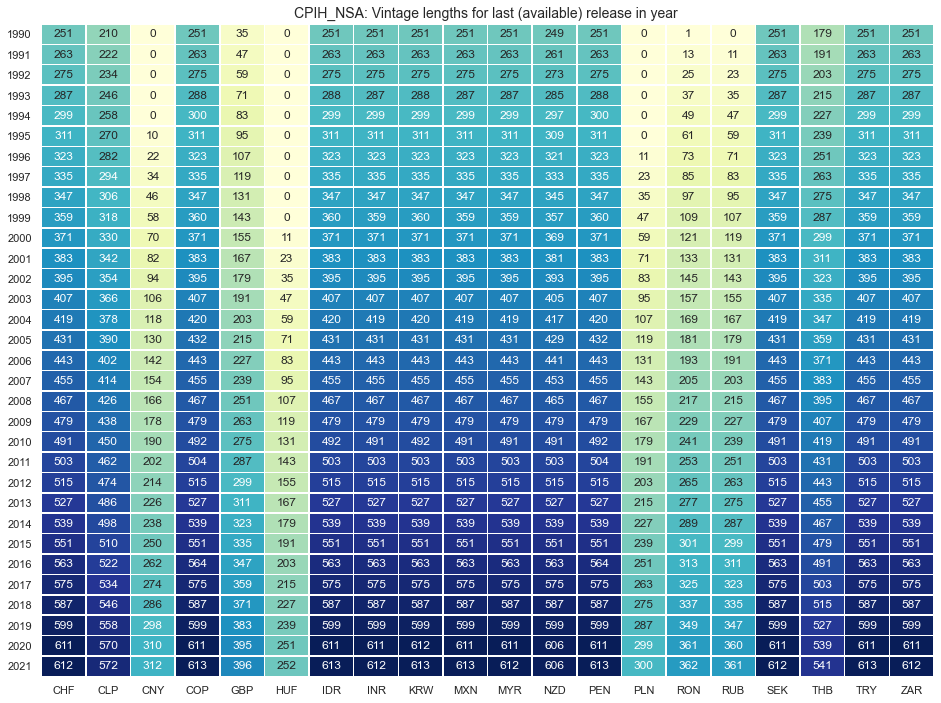

In [9]:
countmap('CPIH_NSA', 1990, (16, 12))
plt.show

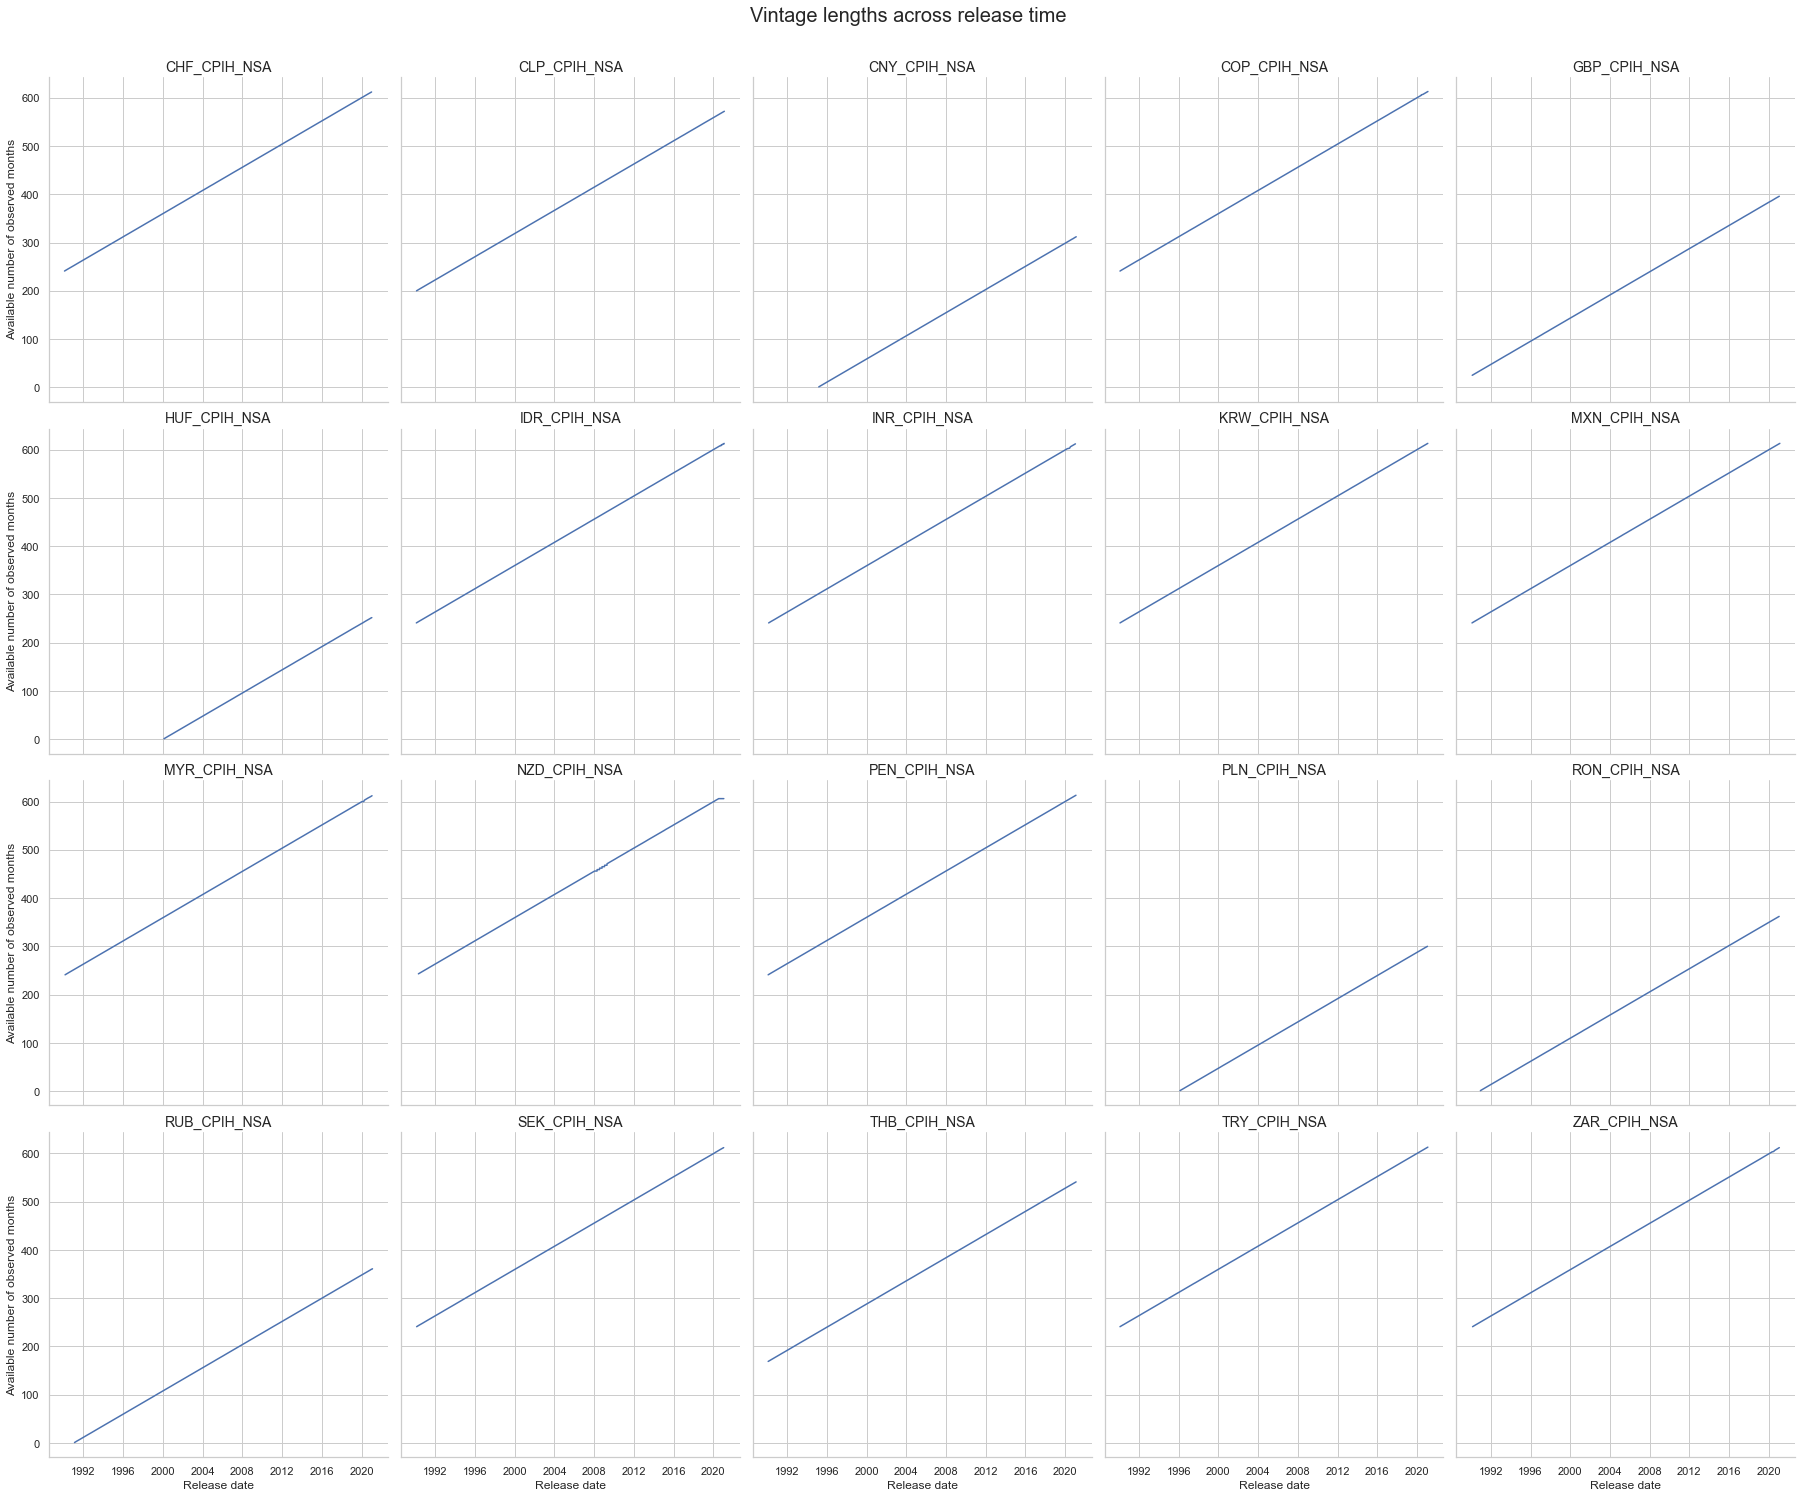

In [10]:
dfm_x = dfm.query('xcat == "CPIH_NSA"')
dfm_x = dfm_x.loc[:, ['ticker', 'release_date', 'observation_date']].groupby(['ticker', 'release_date']).agg('count')
dfm_x.reset_index(inplace=True)
f = sns.relplot(x='release_date', y = 'observation_date', data=dfm_x, kind='line', col='ticker', col_wrap=5)
(f.set_axis_labels("Release date", "Available number of observed months")
  .set_titles("{col_name}", size=14)
  .fig.suptitle('Vintage lengths across release time', y = 1.03, fontsize=20))
plt.show()

In [11]:
dfm_c = dfm.query('xcat == "CPIH_NSA"')
tiks = np.sort(dfm_c['ticker'].unique())
for tik in tiks:
    qs.misc.Vintages.vintages_check(dfm_c, tik)

The vintages of CHF_CPIH_NSA display no irregularities.
The vintages of CLP_CPIH_NSA display no irregularities.
The vintages of CNY_CPIH_NSA display no irregularities.
The vintages of COP_CPIH_NSA display no irregularities.
The vintages of GBP_CPIH_NSA display no irregularities.
The vintages of HUF_CPIH_NSA display no irregularities.
The vintages of IDR_CPIH_NSA display no irregularities.
The vintages of INR_CPIH_NSA display no irregularities.
The vintages of KRW_CPIH_NSA display no irregularities.
The vintages of MXN_CPIH_NSA display no irregularities.
The vintages of MYR_CPIH_NSA display no irregularities.
The vintages of NZD_CPIH_NSA display no irregularities.
The vintages of PEN_CPIH_NSA display no irregularities.
The vintages of PLN_CPIH_NSA display no irregularities.
The vintages of RON_CPIH_NSA display no irregularities.
The vintages of RUB_CPIH_NSA display no irregularities.
The vintages of SEK_CPIH_NSA display no irregularities.
The vintages of THB_CPIH_NSA display no irregula

### Availability of CPIC_NSA

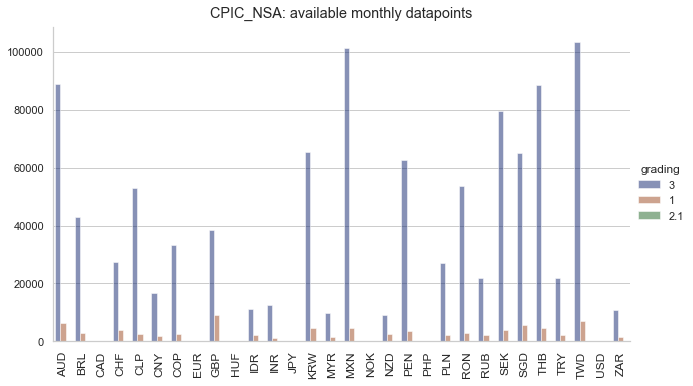

In [8]:
xcat = 'CPIC_NSA'
sns.set_theme(style='whitegrid')
g = sns.catplot(data=dfm[dfm['xcat']==xcat], kind='count', order=cids, 
                x='cross_section', palette='dark', aspect=1.8, alpha=0.5, hue='grading')
g.set_xticklabels(rotation=90, size=12)
g.fig.suptitle(f'{xcat}: available monthly datapoints', y=1.02)
plt.xlabel('')
plt.ylabel('')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

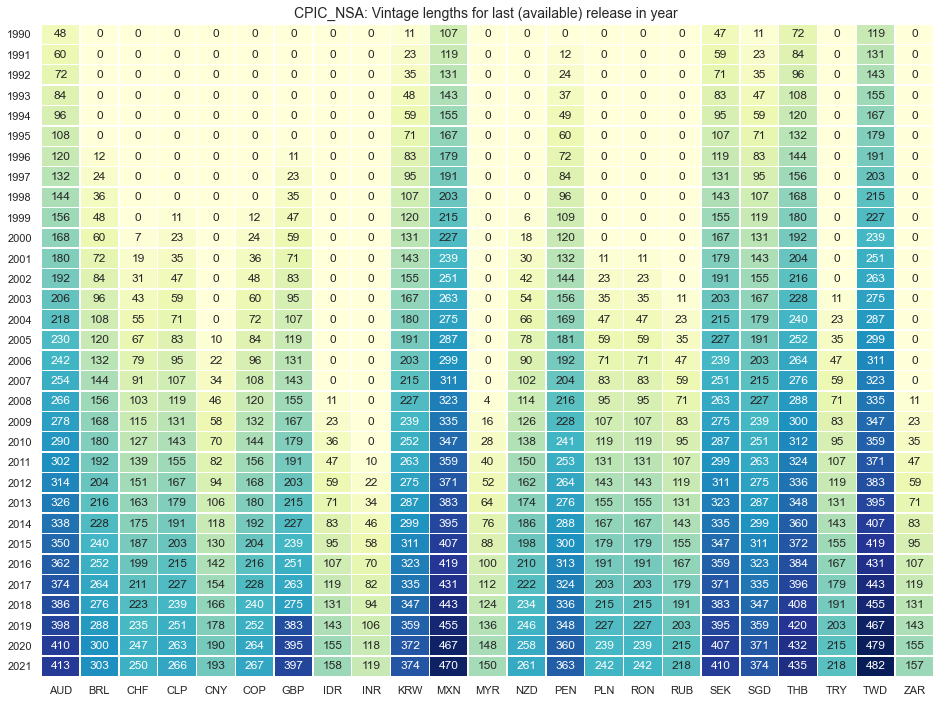

In [9]:
countmap('CPIC_NSA', 1990, (16, 12))
plt.show

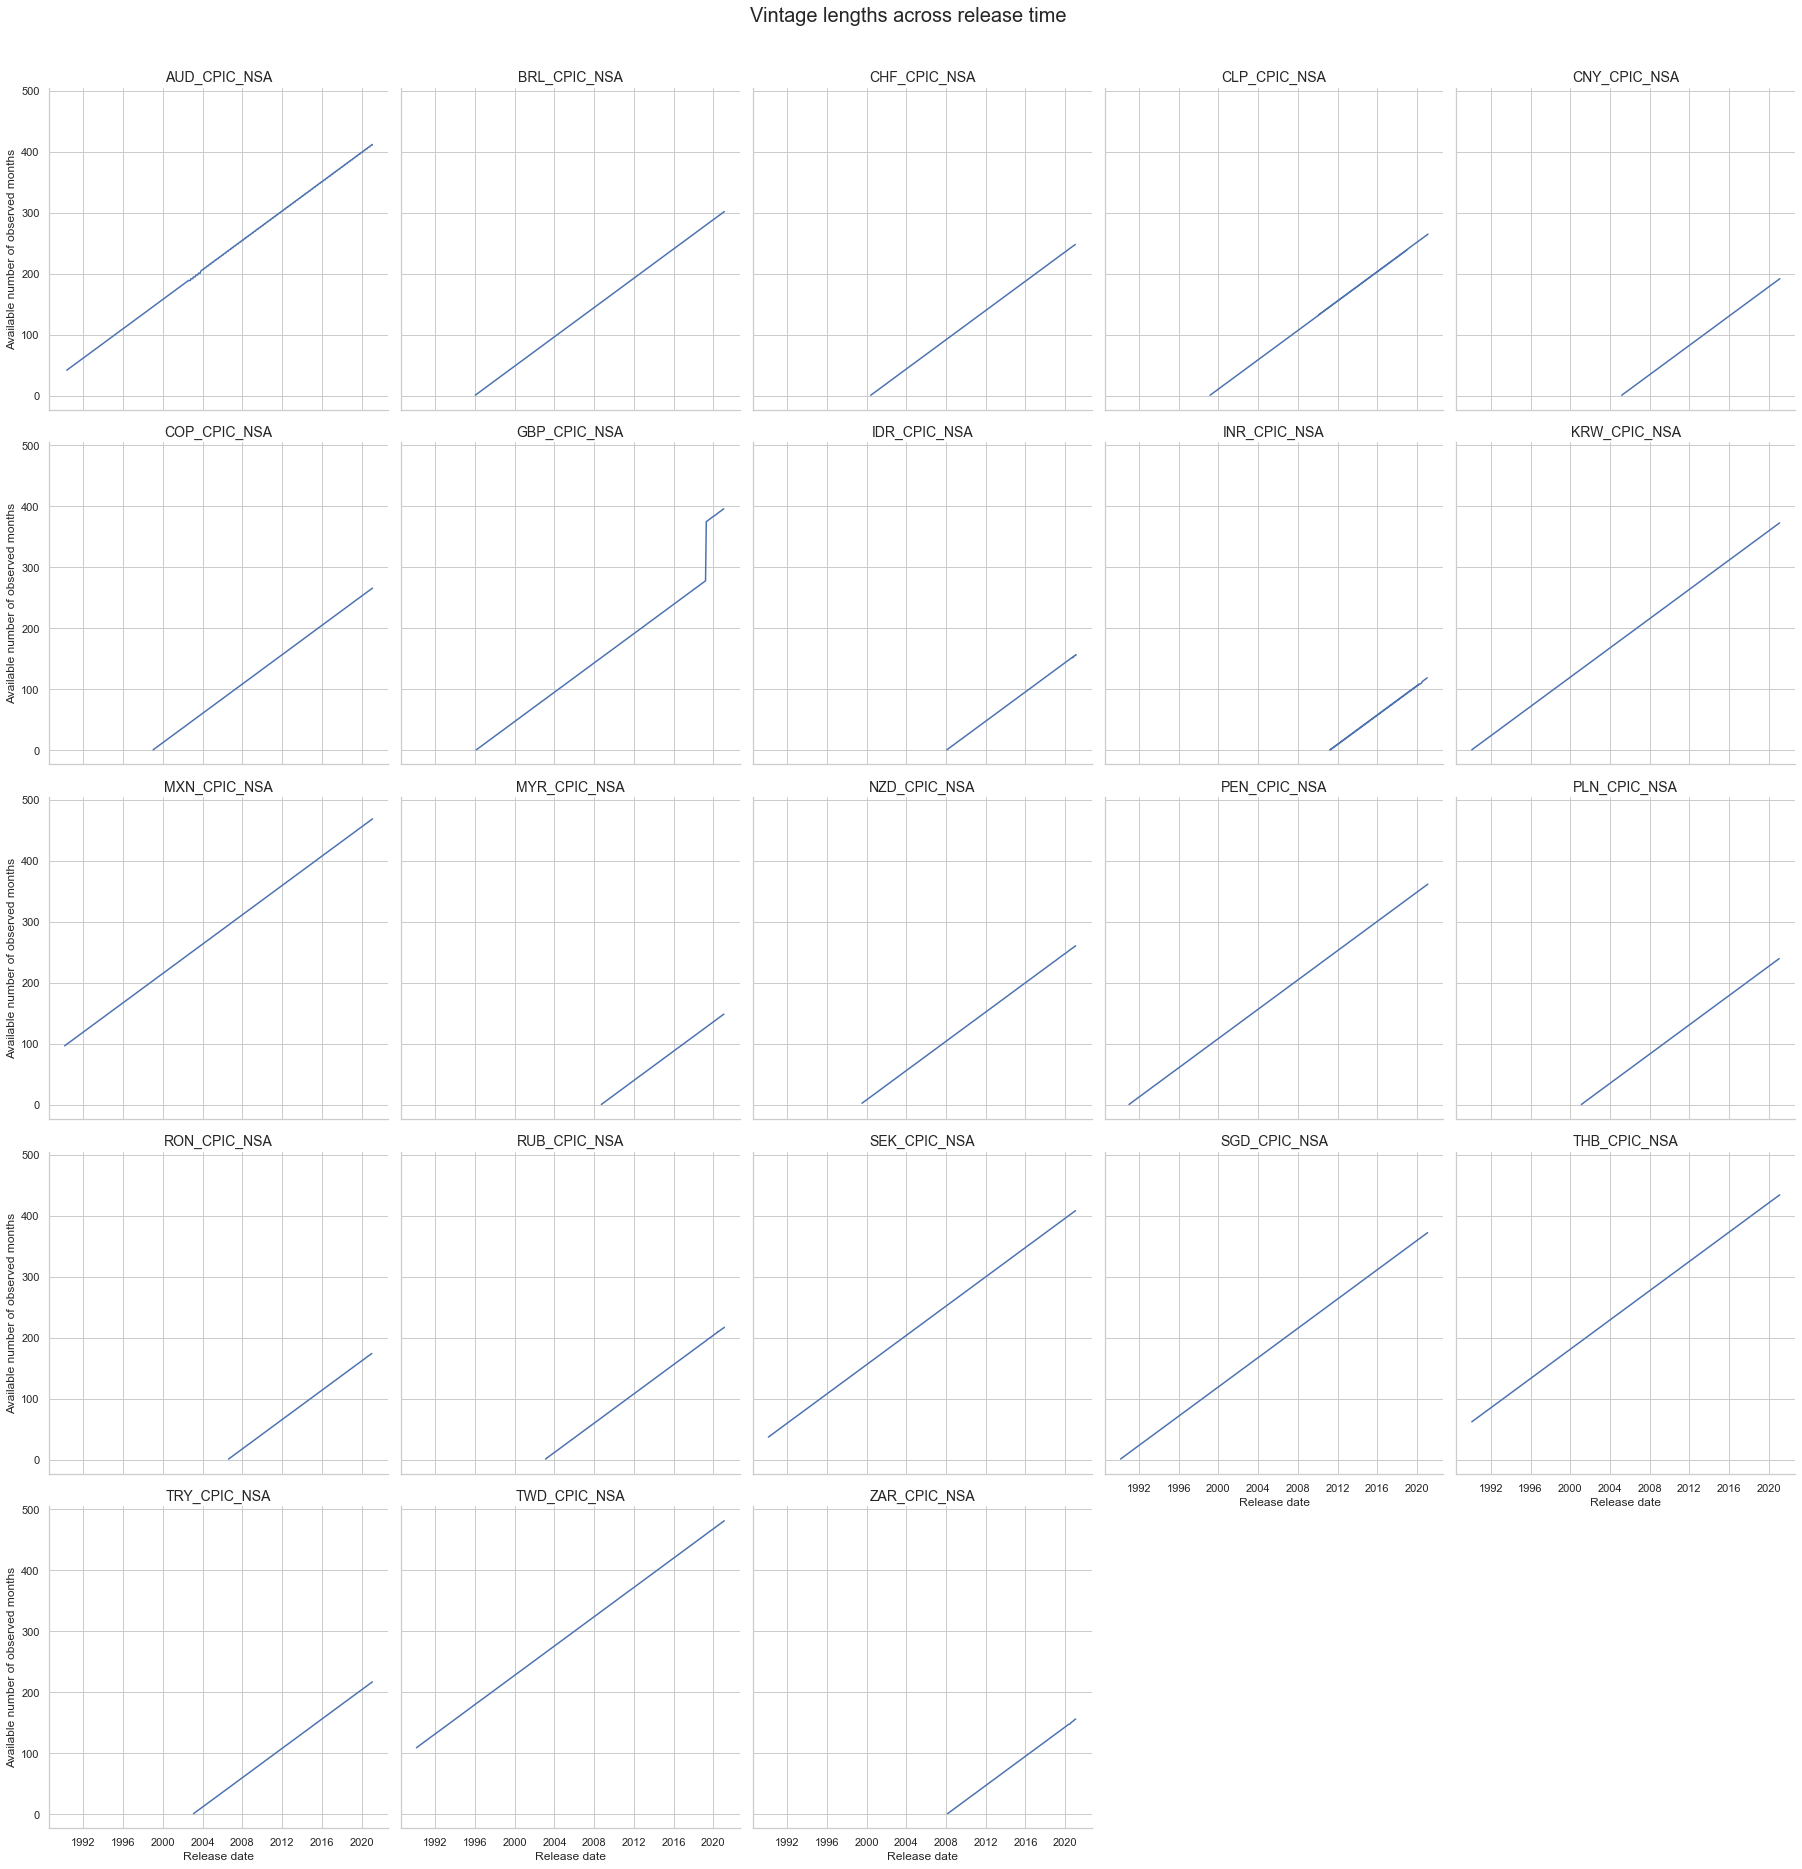

In [14]:
dfm_x = dfm.query('xcat == "CPIC_NSA"')
dfm_x = dfm_x.loc[:, ['ticker', 'release_date', 'observation_date']].groupby(['ticker', 'release_date']).agg('count')
dfm_x.reset_index(inplace=True)
f = sns.relplot(x='release_date', y = 'observation_date', data=dfm_x, kind='line', col='ticker', col_wrap=5)
(f.set_axis_labels("Release date", "Available number of observed months")
  .set_titles("{col_name}", size=14)
  .fig.suptitle('Vintage lengths across release time', y = 1.03, fontsize=20))
plt.show()

In [15]:
dfm_c = dfm.query('xcat == "CPIC_NSA"')
tiks = np.sort(dfm_c['ticker'].unique())
for tik in tiks:
    qs.misc.Vintages.vintages_check(dfm_c, tik)

The vintages of AUD_CPIC_NSA display no irregularities.
The vintages of BRL_CPIC_NSA display no irregularities.
The vintages of CHF_CPIC_NSA display no irregularities.
The vintages of CLP_CPIC_NSA display no irregularities.
The vintages of CNY_CPIC_NSA display no irregularities.
The vintages of COP_CPIC_NSA display no irregularities.
The vintages of GBP_CPIC_NSA display no irregularities.
The vintages of IDR_CPIC_NSA display no irregularities.
The vintages of INR_CPIC_NSA display no irregularities.
The vintages of KRW_CPIC_NSA display no irregularities.
The vintages of MXN_CPIC_NSA display no irregularities.
The vintages of MYR_CPIC_NSA display no irregularities.
The vintages of NZD_CPIC_NSA display no irregularities.
The vintages of PEN_CPIC_NSA display no irregularities.
The vintages of PLN_CPIC_NSA display no irregularities.
The vintages of RON_CPIC_NSA display no irregularities.
The vintages of RUB_CPIC_NSA display no irregularities.
The vintages of SEK_CPIC_NSA display no irregula

### Availability of CPIH_SA

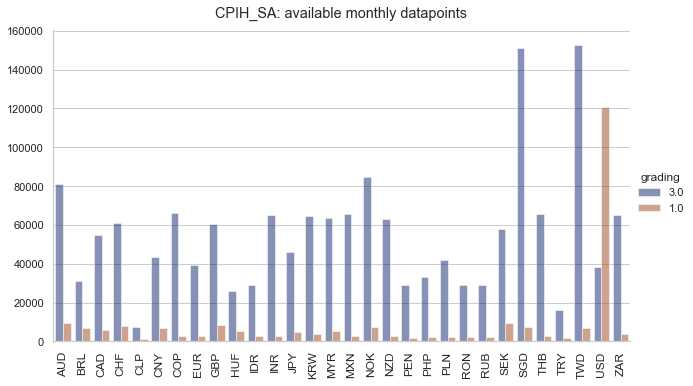

In [16]:
xcat = 'CPIH_SA'
sns.set_theme(style='whitegrid')
g = sns.catplot(data=dfm[dfm['xcat']==xcat], kind='count', order=cids, 
                x='cross_section', palette='dark', aspect=1.8, alpha=0.5, hue='grading')
g.set_xticklabels(rotation=90, size=12)
g.fig.suptitle(f'{xcat}: available monthly datapoints', y=1.02)
plt.xlabel('')
plt.ylabel('')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

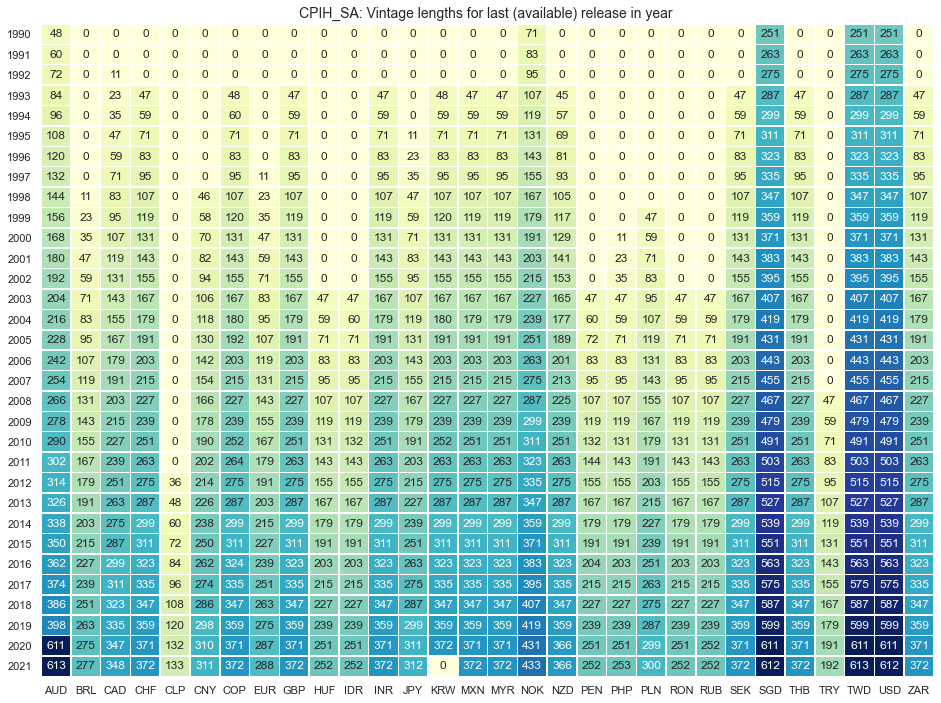

In [17]:
countmap('CPIH_SA', 1990, (16, 12))
plt.show

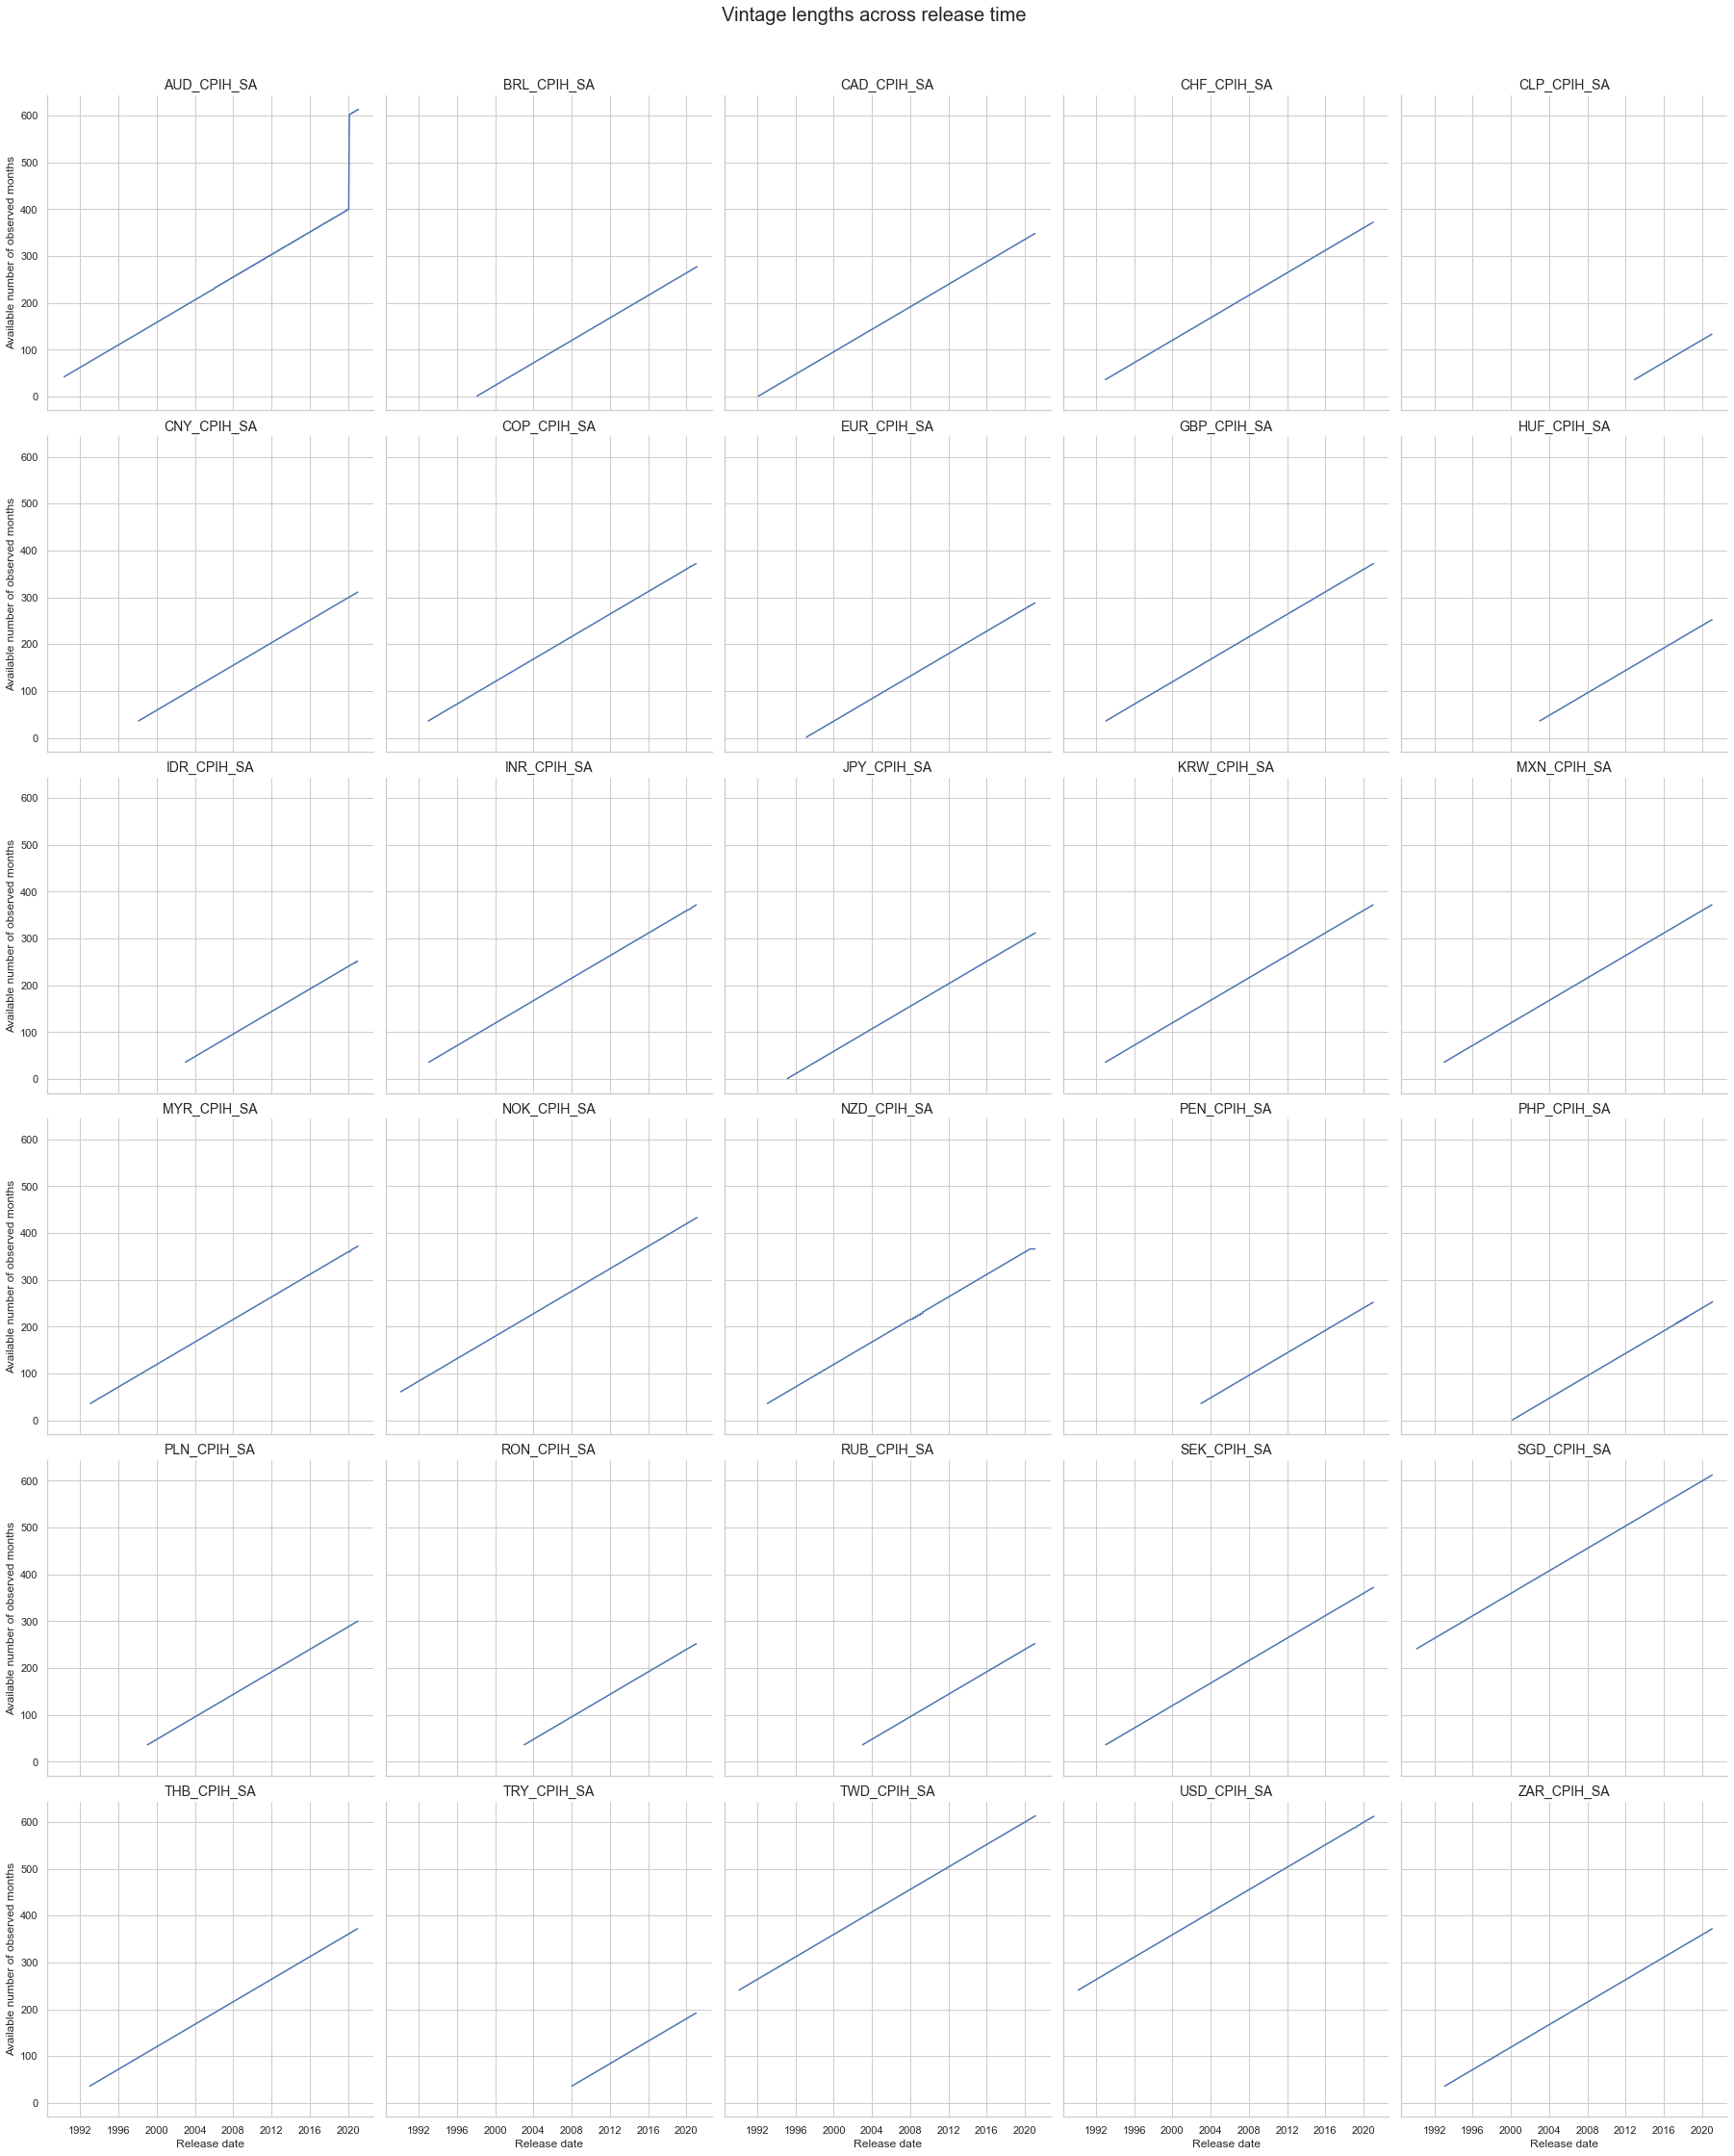

In [18]:
dfm_x = dfm.query('xcat == "CPIH_SA"')
dfm_x = dfm_x.loc[:, ['ticker', 'release_date', 'observation_date']].groupby(['ticker', 'release_date']).agg('count')
dfm_x.reset_index(inplace=True)
f = sns.relplot(x='release_date', y = 'observation_date', data=dfm_x, kind='line', col='ticker', col_wrap=5)
(f.set_axis_labels("Release date", "Available number of observed months")
  .set_titles("{col_name}", size=14)
  .fig.suptitle('Vintage lengths across release time', y = 1.03, fontsize=20))
plt.show()

### Availability of CPIC_SA

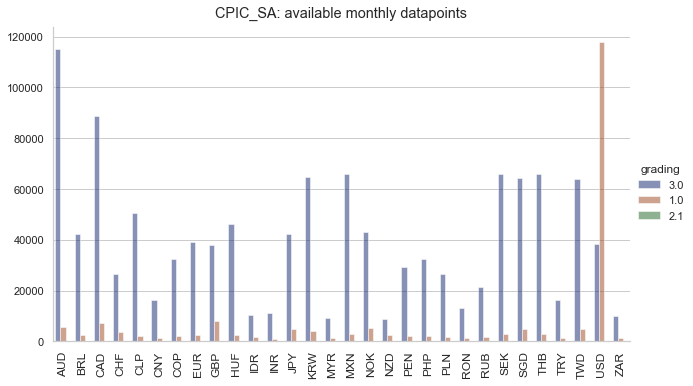

In [19]:
xcat = 'CPIC_SA'
sns.set_theme(style='whitegrid')
g = sns.catplot(data=dfm[dfm['xcat']==xcat], kind='count', order=cids, 
                x='cross_section', palette='dark', aspect=1.8, alpha=0.5, hue='grading')
g.set_xticklabels(rotation=90, size=12)
g.fig.suptitle(f'{xcat}: available monthly datapoints', y=1.02)
plt.xlabel('')
plt.ylabel('')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

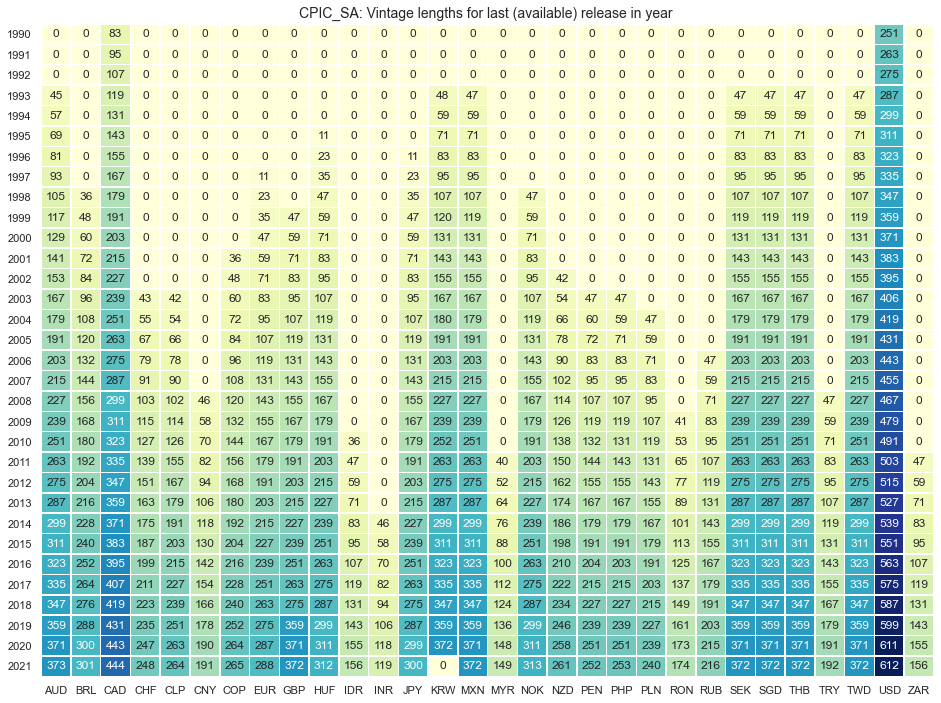

In [20]:
countmap('CPIC_SA', 1990, (16, 12))
plt.show

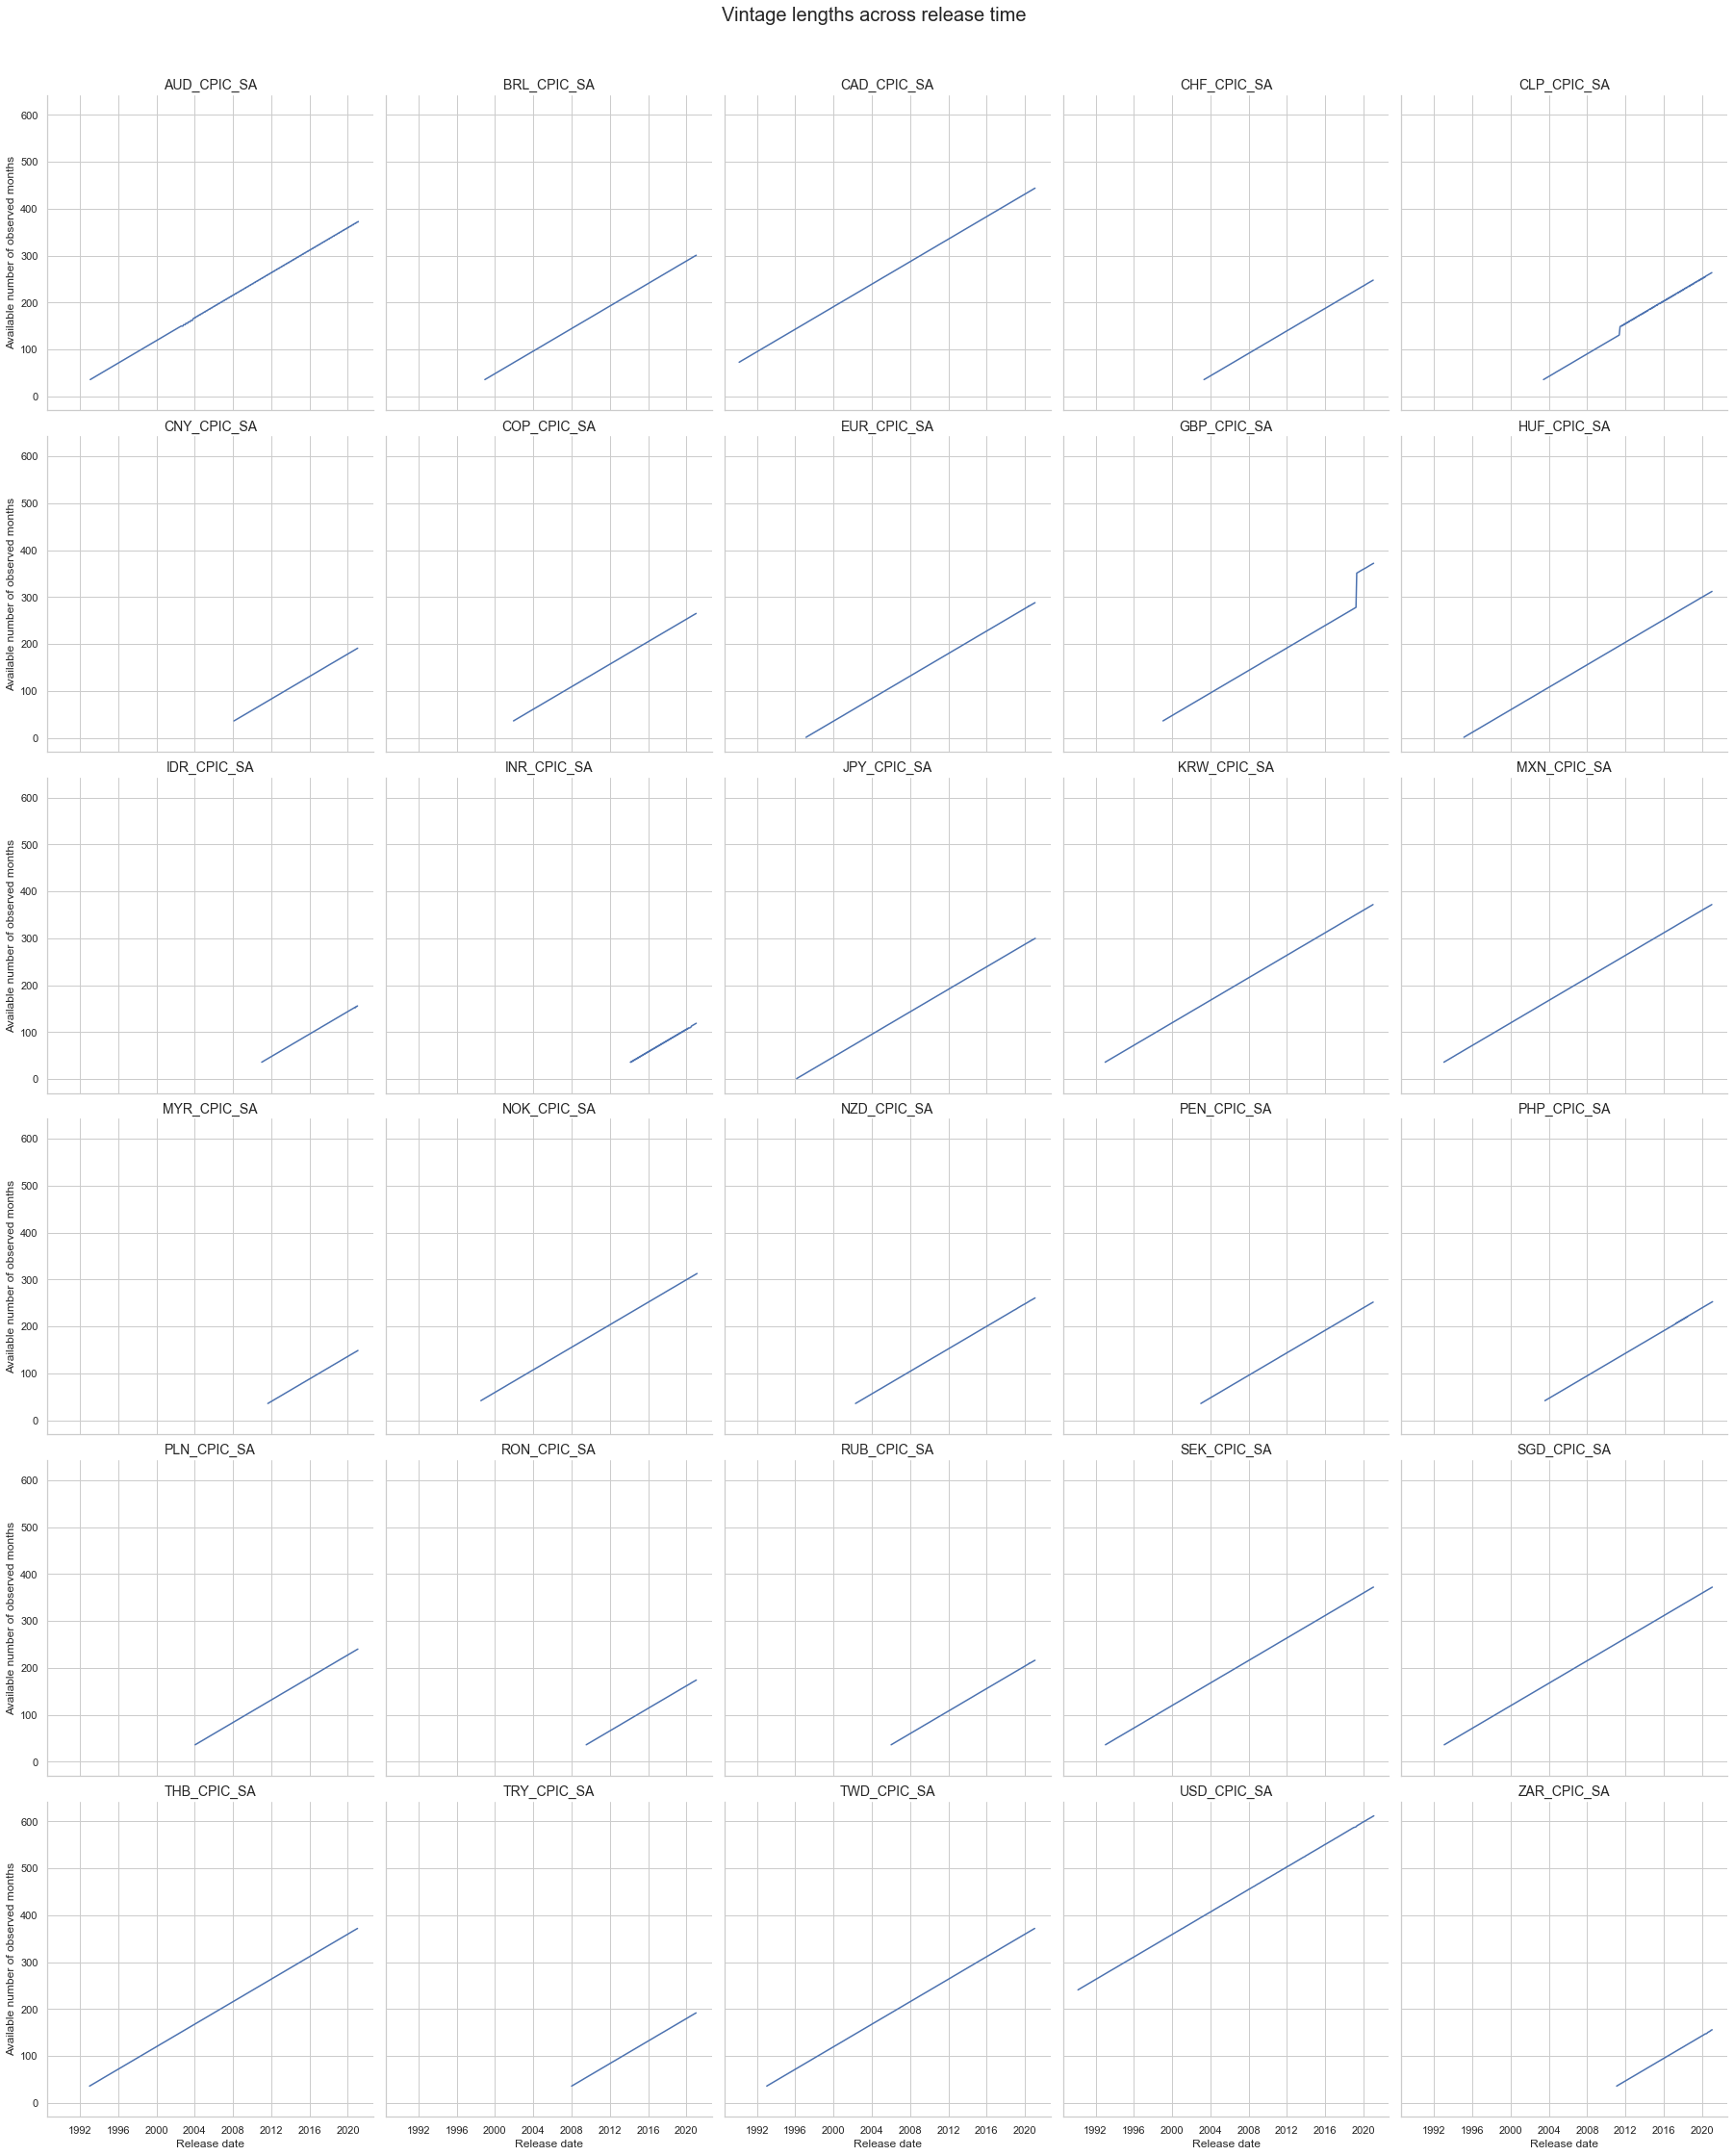

In [21]:
dfm_x = dfm.query('xcat == "CPIC_SA"')
dfm_x = dfm_x.loc[:, ['ticker', 'release_date', 'observation_date']].groupby(['ticker', 'release_date']).agg('count')
dfm_x.reset_index(inplace=True)
f = sns.relplot(x='release_date', y = 'observation_date', data=dfm_x, kind='line', col='ticker', col_wrap=5)
(f.set_axis_labels("Release date", "Available number of observed months")
  .set_titles("{col_name}", size=14)
  .fig.suptitle('Vintage lengths across release time', y = 1.03, fontsize=20))
plt.show()

### Availability of CPIH_SJA

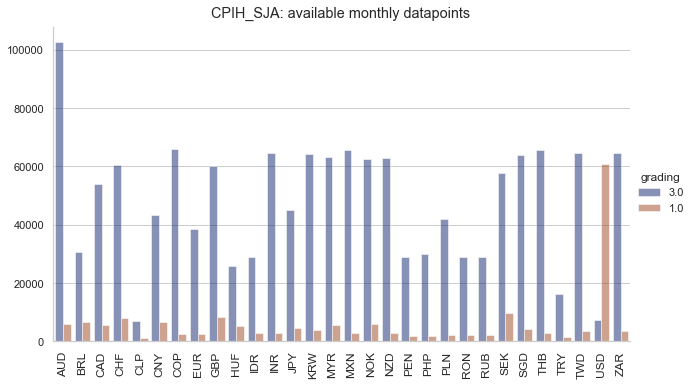

In [22]:
xcat = 'CPIH_SJA'
sns.set_theme(style='whitegrid')
g = sns.catplot(data=dfm[dfm['xcat']==xcat], kind='count', order=cids, 
                x='cross_section', palette='dark', aspect=1.8, alpha=0.5, hue='grading')
g.set_xticklabels(rotation=90, size=12)
g.fig.suptitle(f'{xcat}: available monthly datapoints', y=1.02)
plt.xlabel('')
plt.ylabel('')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

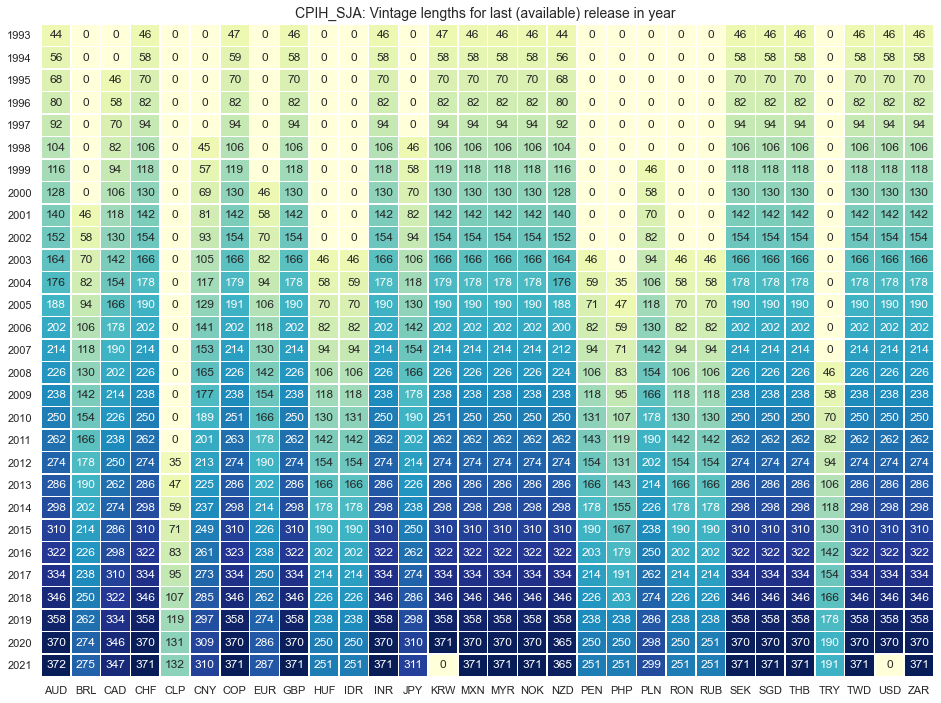

In [23]:
countmap('CPIH_SJA', 1990, (16, 12))
plt.show

### Availability of CPIC_SJA

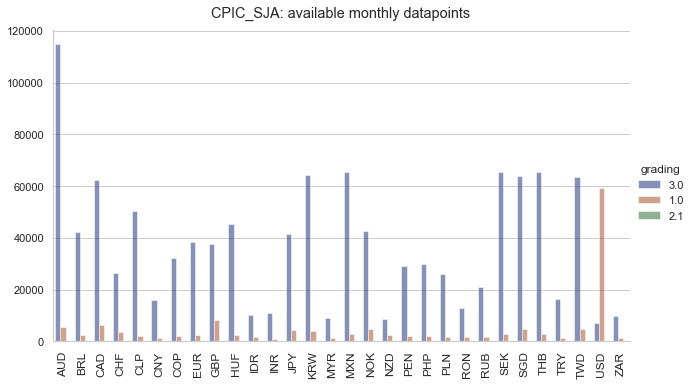

In [24]:
xcat = 'CPIC_SJA'
sns.set_theme(style='whitegrid')
g = sns.catplot(data=dfm[dfm['xcat']==xcat], kind='count', order=cids, 
                x='cross_section', palette='dark', aspect=1.8, alpha=0.5, hue='grading')
g.set_xticklabels(rotation=90, size=12)
g.fig.suptitle(f'{xcat}: available monthly datapoints', y=1.02)
plt.xlabel('')
plt.ylabel('')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

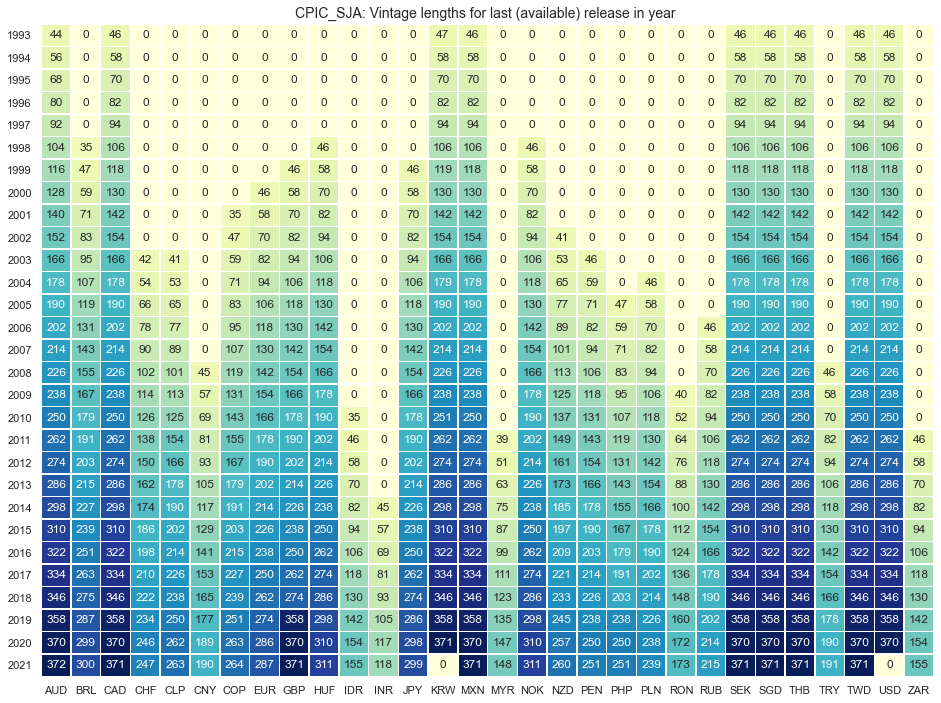

In [25]:
countmap('CPIC_SJA', 1990, (16, 12))
plt.show

## Revisions

In [10]:
def revlines(df, pots, ncols=4, size = (16, 16)):
    
    xids = np.sort(df['cross_section'].unique())
    
    sns.set_style('whitegrid')
    colors = sns.color_palette("Blues", len(pots))
    fig, axes = plt.subplots(nrows=math.ceil(len(xids)/ncols), ncols=ncols, sharex=True, figsize=size)

    for i in range(len(xids)):
        cid = xids[i]
        dfc = df.query('cross_section == @cid')
        releases = dfc['release_date'].unique()
        for p in range(len(pots)):  # get releases nearest and before chosen ones
            release = releases[(releases <= pd.to_datetime(pots[p]))].max()
            dfcx_add = dfc[dfc['release_date'].isin([release])]
            dfcx_add['value'] = 100* dfcx_add['value'].pct_change(12)
            dfcx = dfcx_add if (p == 0) else dfcx.append(dfcx_add) 
        axe = axes[math.floor(i / ncols), (i % ncols)]
        sns.lineplot(data=dfcx,  x="observation_date", y="value", 
                     hue="release_date", palette=colors, ax=axe)
        axe.set(title=cid, ylabel="", xlabel="")

    plt.show()

### Revisions of CPIH_NSA

<function matplotlib.pyplot.show(*args, **kw)>

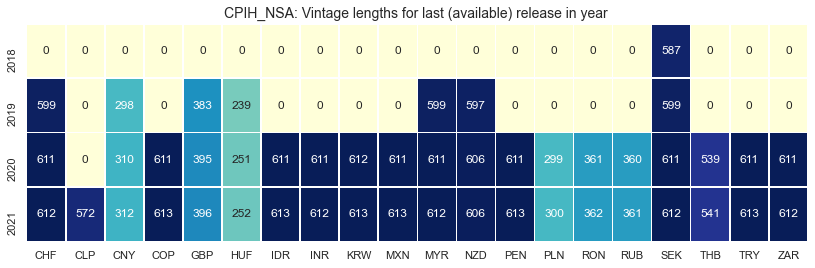

In [27]:
countmap('CPIH_NSA', 1990, (14, 4), trueVin=True)
plt.show

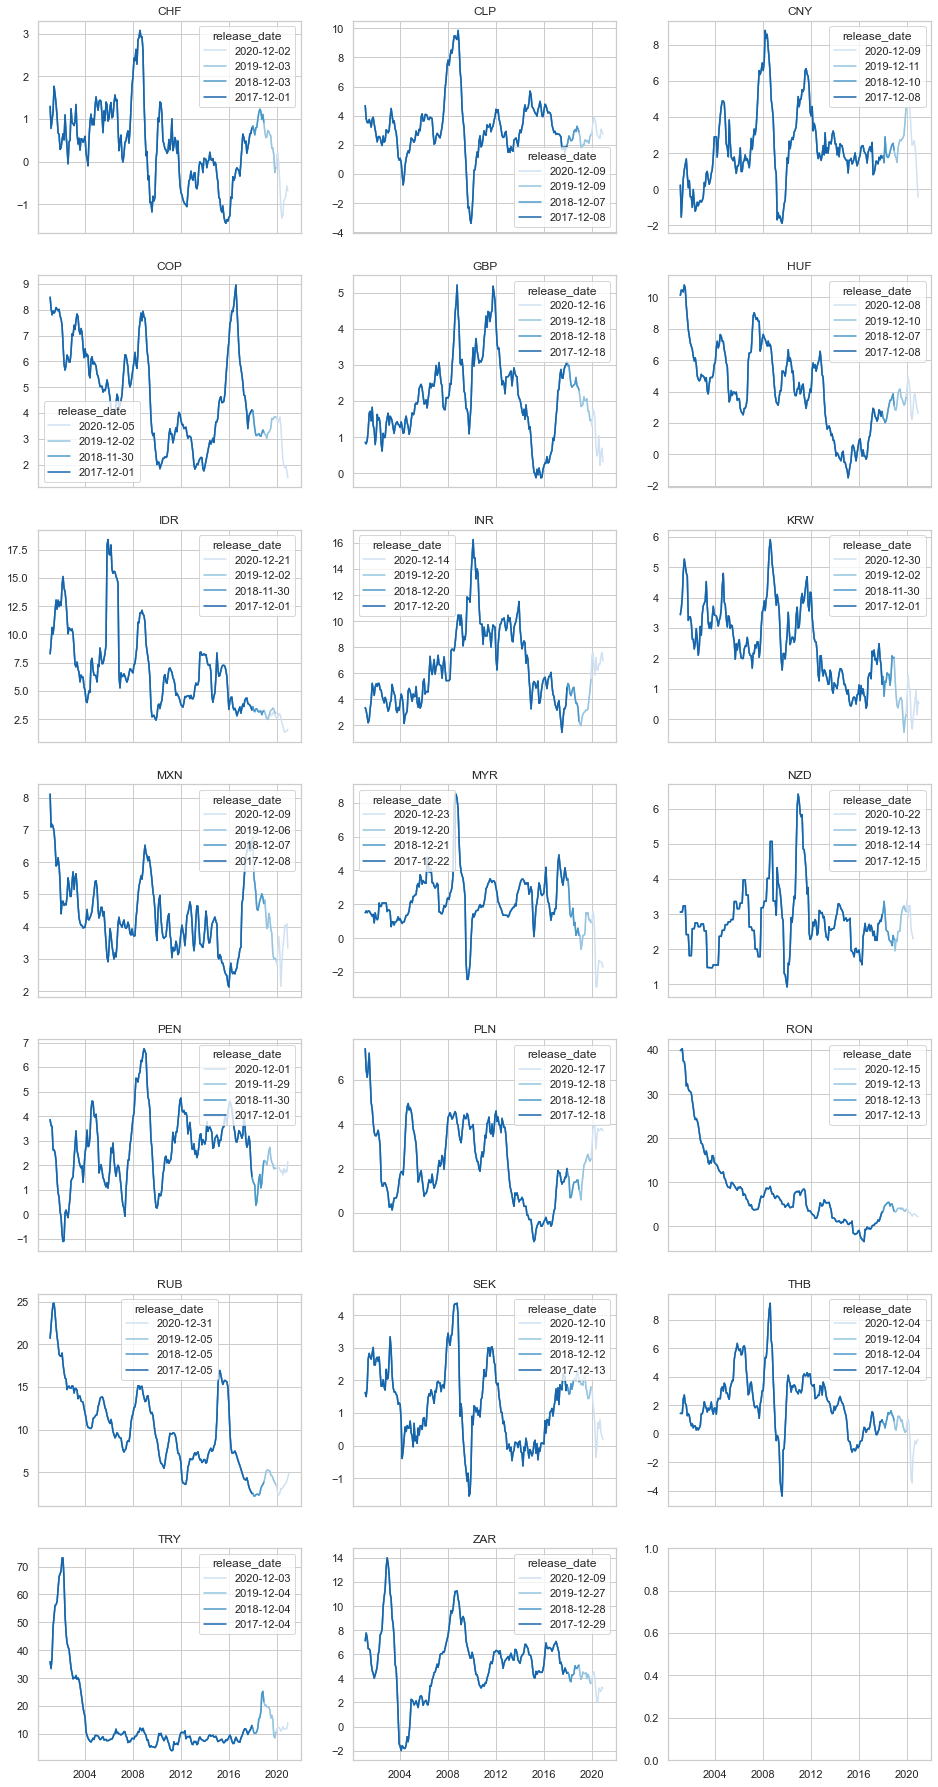

In [28]:
pots = ['2020-12-31', '2019-12-31', '2018-12-31', '2017-12-31']
filt1 = dfm['observation_date'] > pd.to_datetime('2000-01-01')
filt2 = dfm['xcat'] == 'CPIH_NSA'
dfm_x = dfm[filt1 & filt2] 

revlines(dfm_x, pots=pots, ncols=3, size = (16, 32))

### Revisions of CPIC_NSA

<function matplotlib.pyplot.show(*args, **kw)>

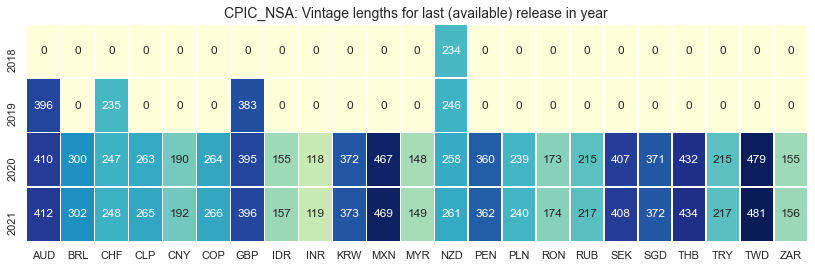

In [29]:
countmap('CPIC_NSA', 1990, (14, 4), trueVin=True)
plt.show

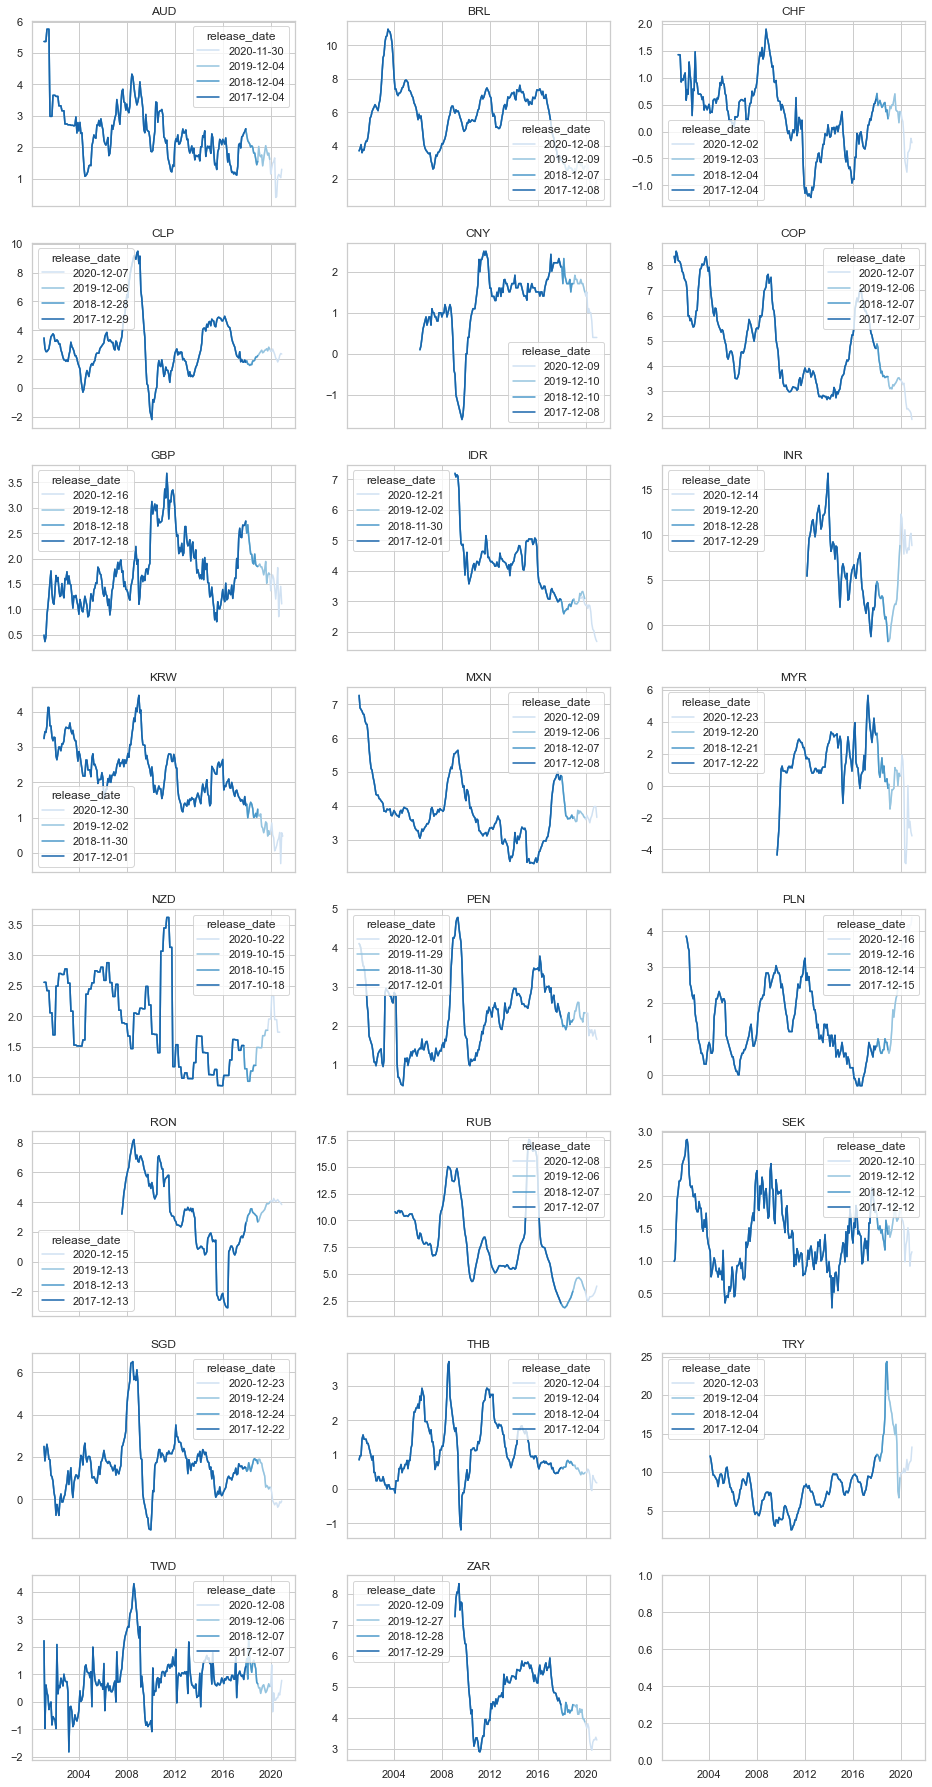

In [30]:
pots = ['2020-12-31', '2019-12-31', '2018-12-31', '2017-12-31']
filt1 = dfm['observation_date'] > pd.to_datetime('2000-01-01')
filt2 = dfm['xcat'] == 'CPIC_NSA'
dfm_x = dfm[filt1 & filt2] 

revlines(dfm_x, pots=pots, ncols=3, size = (16, 32))

### Revisions of CPIH_SA

<function matplotlib.pyplot.show(*args, **kw)>

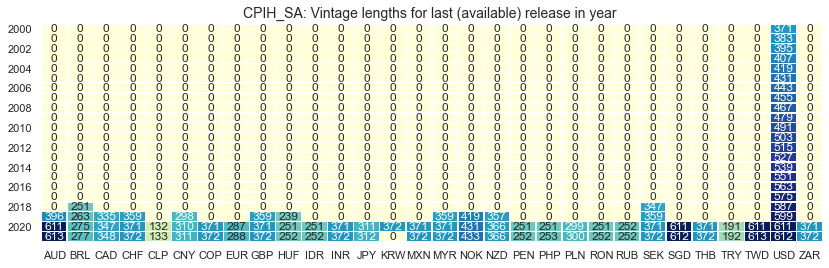

In [31]:
countmap('CPIH_SA', 1990, (14, 4), trueVin=True)
plt.show

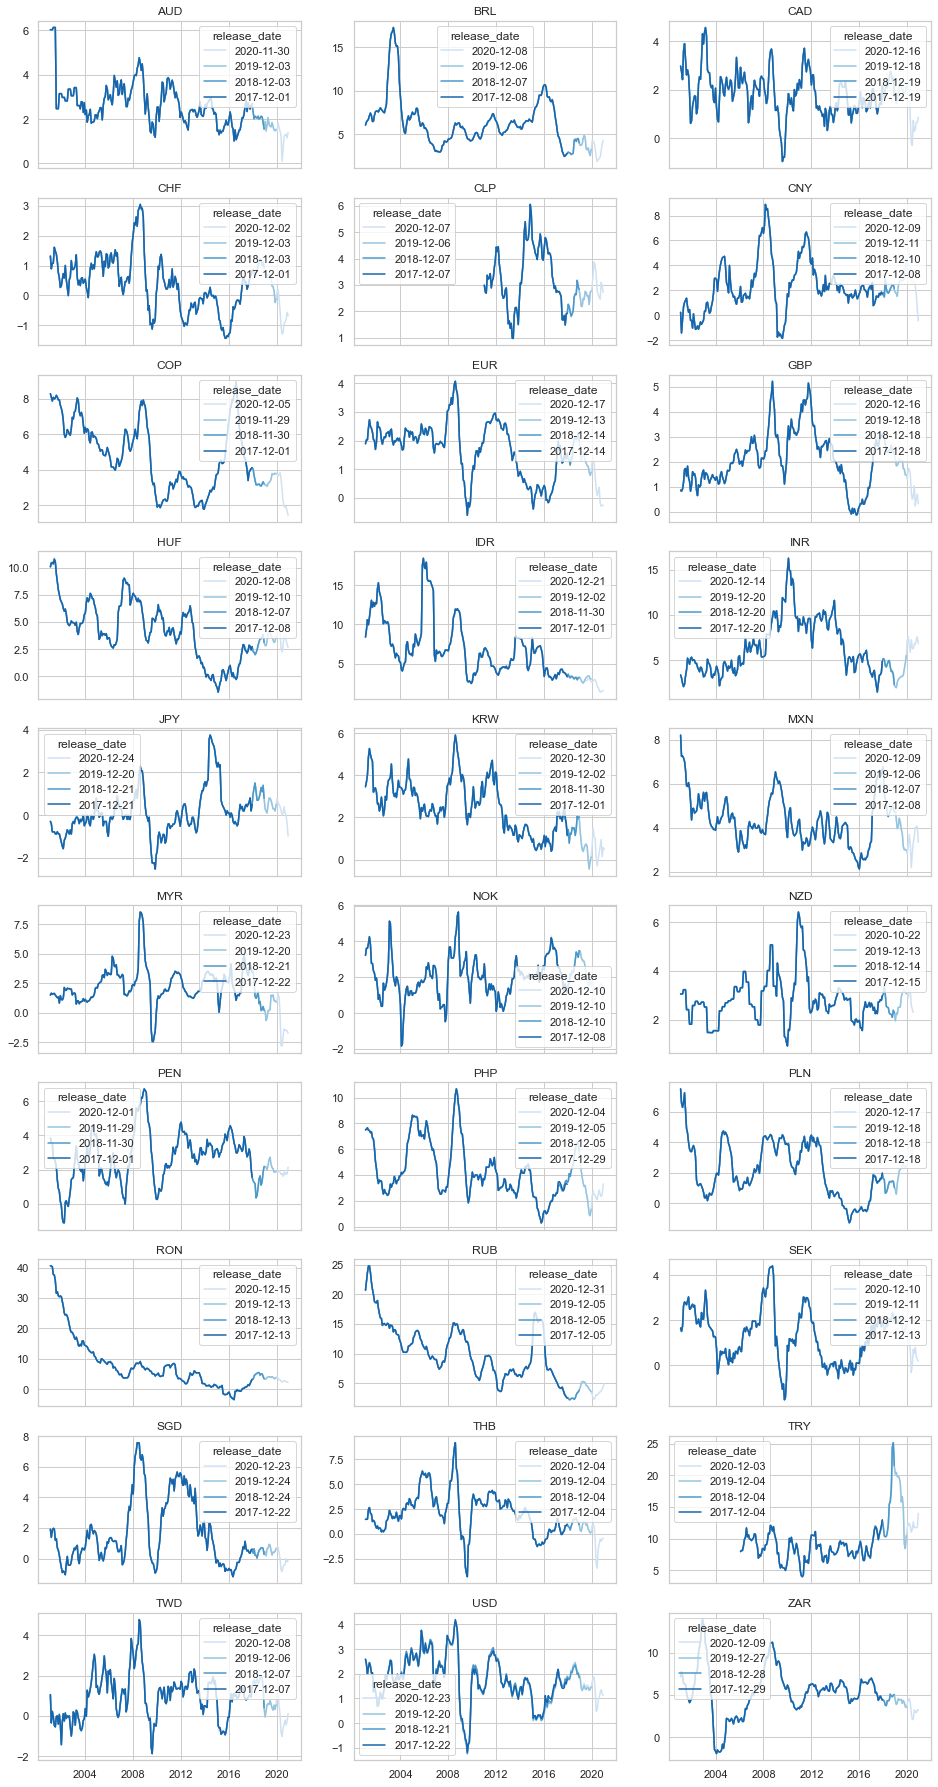

In [32]:
pots = ['2020-12-31', '2019-12-31', '2018-12-31', '2017-12-31']
filt1 = dfm['observation_date'] > pd.to_datetime('2000-01-01')
filt2 = dfm['xcat'] == 'CPIH_SA'
dfm_x = dfm[filt1 & filt2] 

revlines(dfm_x, pots=pots, ncols=3, size = (16, 32))

### Revisions of CPIH_SJA

<function matplotlib.pyplot.show(*args, **kw)>

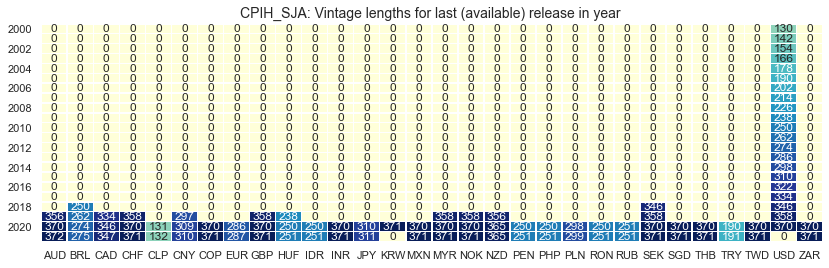

In [33]:
countmap('CPIH_SJA', 1990, (14, 4), trueVin=True)
plt.show

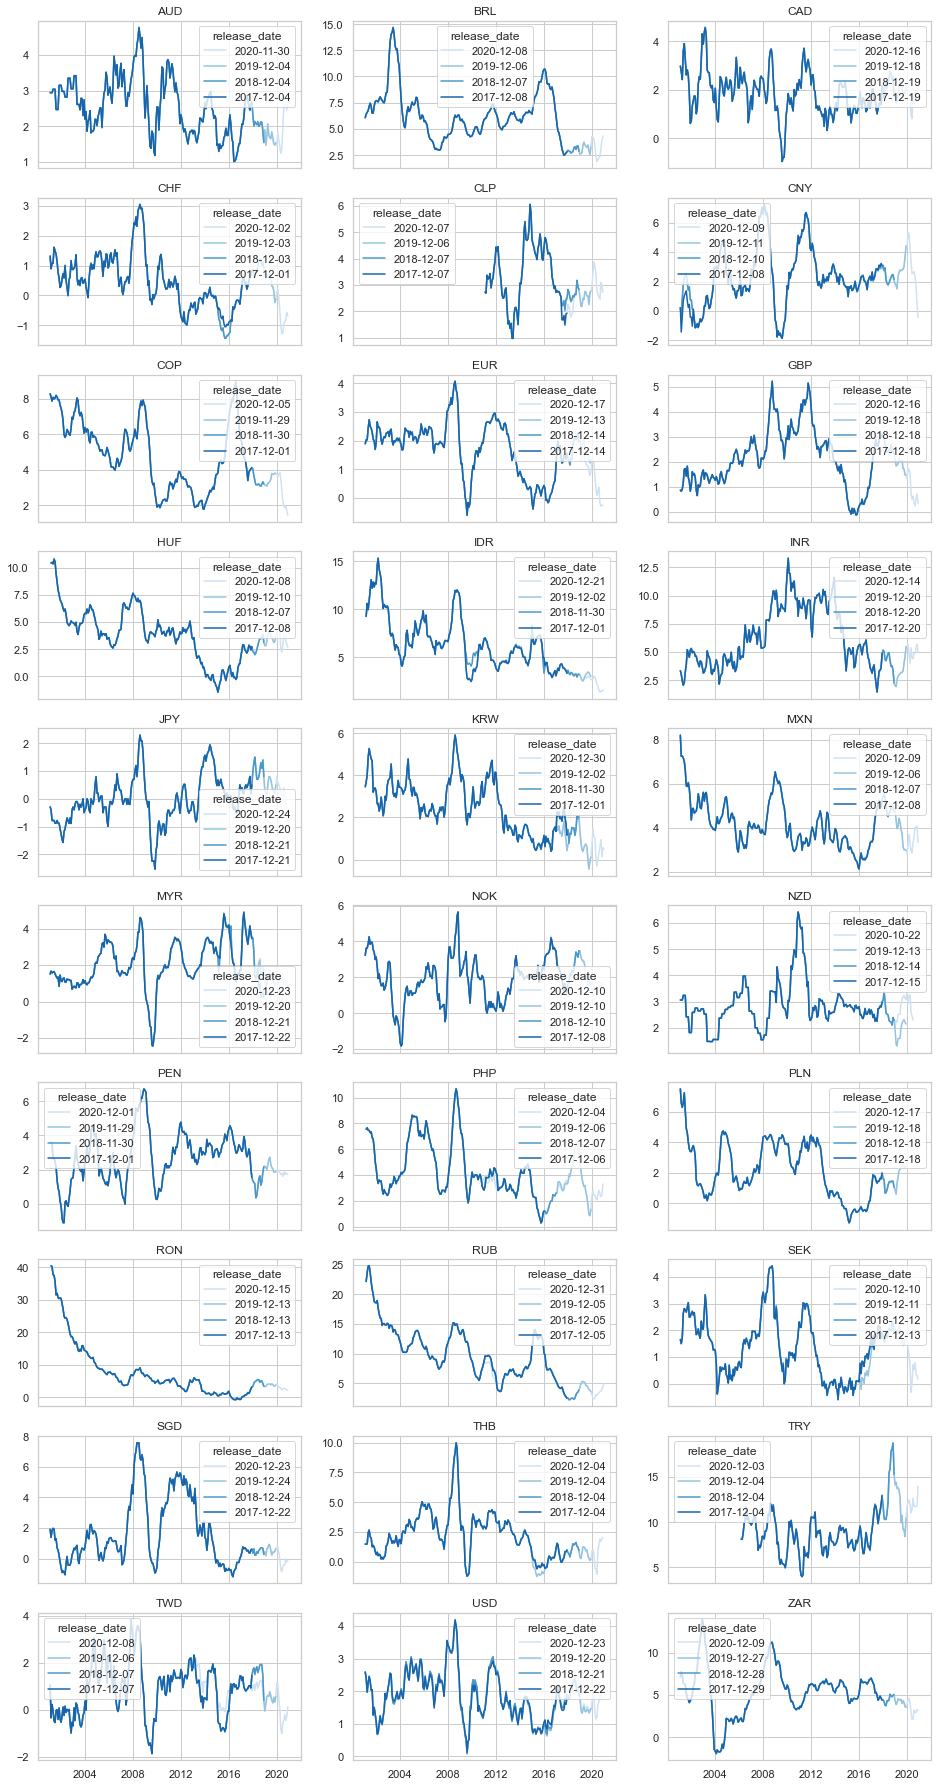

In [34]:
pots = ['2020-12-31', '2019-12-31', '2018-12-31', '2017-12-31']
filt1 = dfm['observation_date'] > pd.to_datetime('2000-01-01')
filt2 = dfm['xcat'] == 'CPIH_SJA'
dfm_x = dfm[filt1 & filt2] 

revlines(dfm_x, pots=pots, ncols=3, size = (16, 32))

### Revisions of CPIC_SA

<function matplotlib.pyplot.show(*args, **kw)>

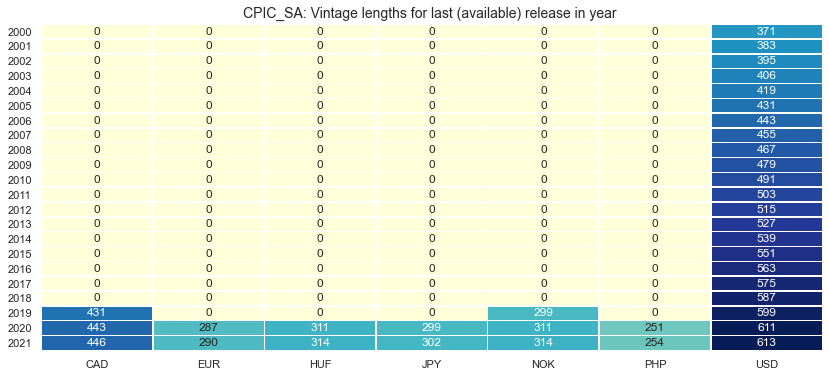

In [14]:
countmap('CPIC_SA', 1990, (14, 6), trueVin=True)
plt.show

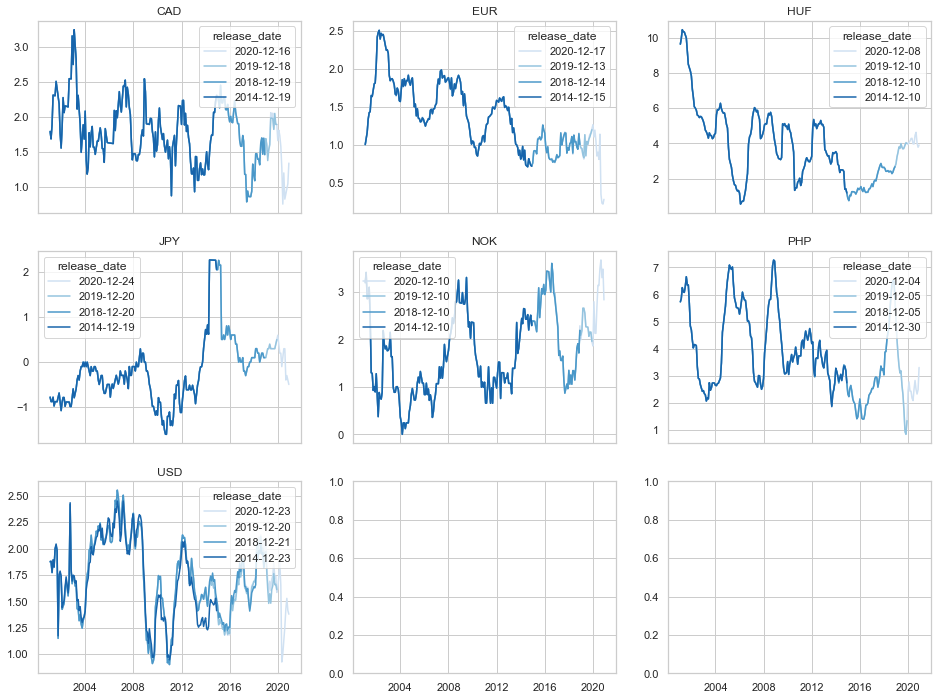

In [19]:
pots = ['2020-12-31', '2019-12-31', '2018-12-31', '2014-12-31']
filt1 = dfm['observation_date'] > pd.to_datetime('2000-01-01')
filt2 = dfm['xcat'] == 'CPIC_SA'
dfm_x = dfm[filt1 & filt2] 

revlines(dfm_x, pots=pots, ncols=3, size = (16, 12))

### Revisions of CPIC_SJA

<function matplotlib.pyplot.show(*args, **kw)>

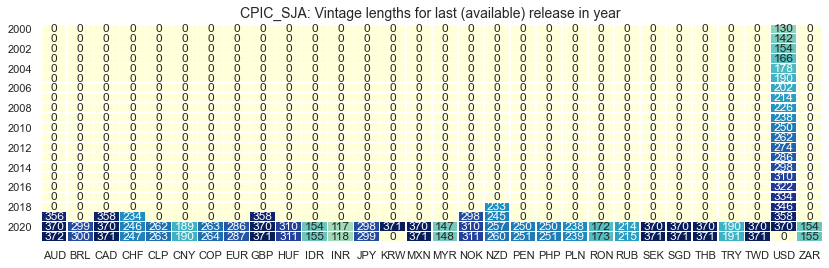

In [37]:
countmap('CPIC_SJA', 1990, (14, 4), trueVin=True)
plt.show

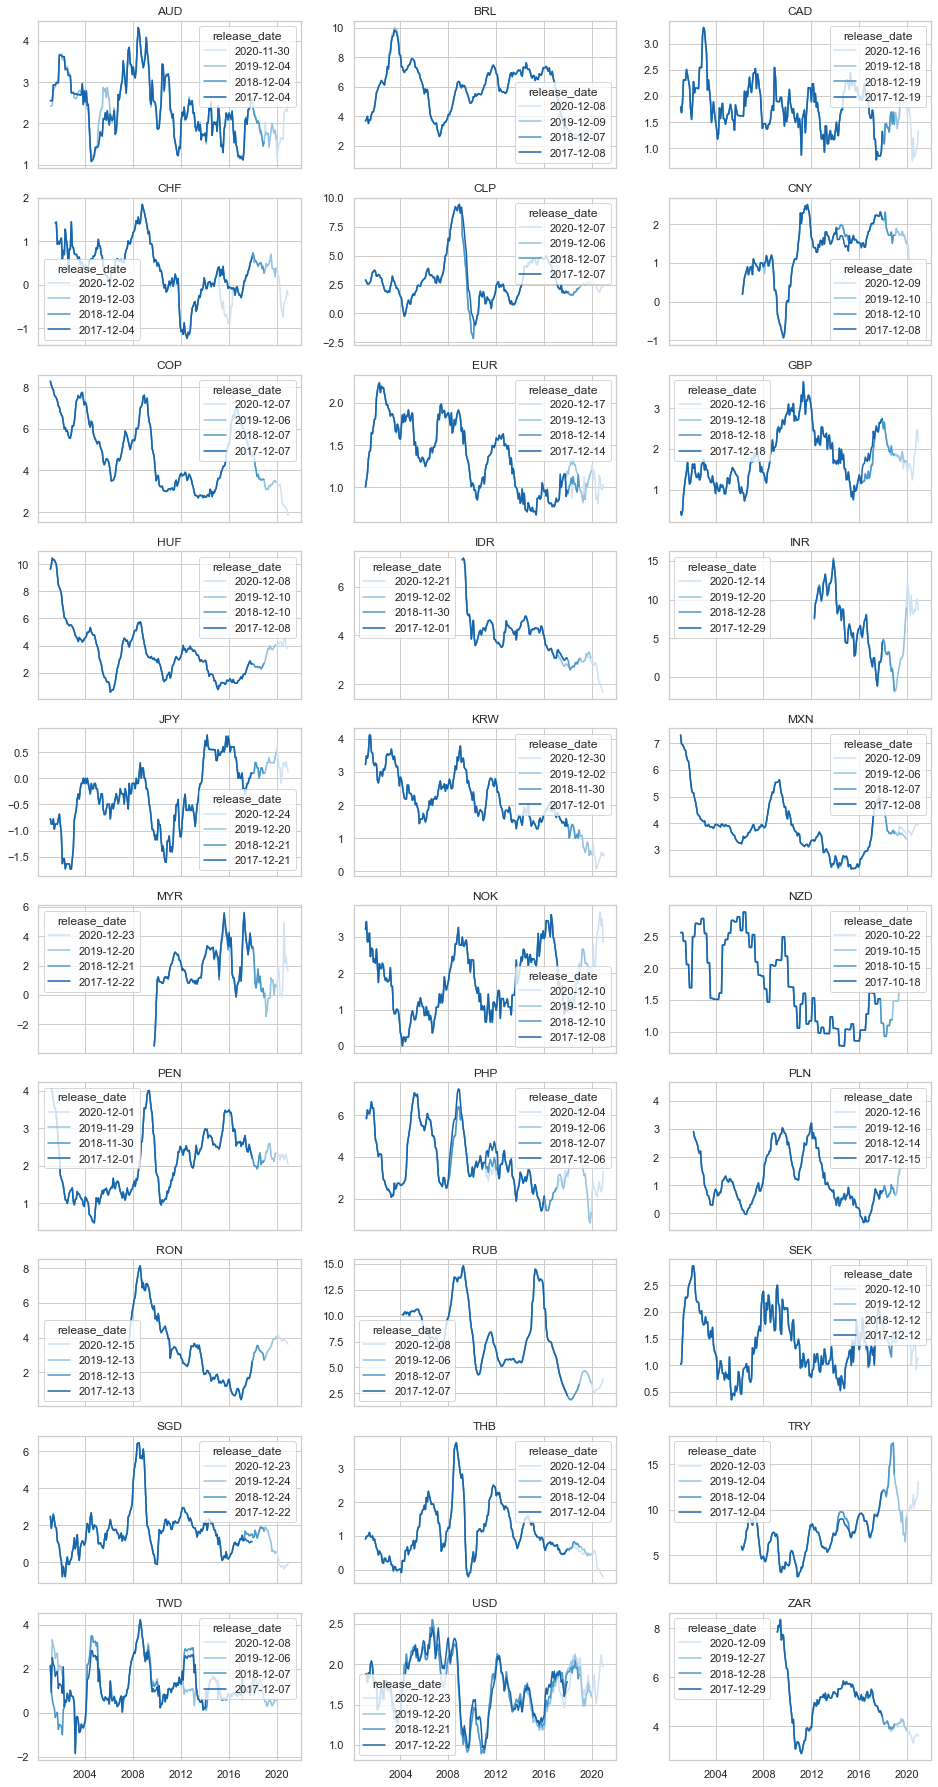

In [38]:
pots = ['2020-12-31', '2019-12-31', '2018-12-31', '2017-12-31']
filt1 = dfm['observation_date'] > pd.to_datetime('2000-01-01')
filt2 = dfm['xcat'] == 'CPIC_SJA'
dfm_x = dfm[filt1 & filt2] 

revlines(dfm_x, pots=pots, ncols=3, size = (16, 32))

## Glance at latest vintages

In [39]:
indices = []
for tick in dfm.ticker.unique():
    dfm_x = dfm[dfm['ticker'] == tick]
    dfm_xx = dfm_x[dfm_x['release_date'] == dfm_x['release_date'].max()]
    indices = indices + dfm_xx.index.tolist()
dfm_lv = dfm.iloc[indices, :]  # dataframe with last release_dates for each ticker only

In [40]:
dfm_lvw = dfm_lv.pivot(index='observation_date', columns='ticker', values='value')  # wide dataframe with ticker columns
dfm_lvw = dfm_lvw[dfm_lvw.index >= pd.to_datetime('1999-01-01')]
dfm_lvw_p = dfm_lvw.pct_change(periods=12) * 100
dfm_lvp = dfm_lvw_p.stack().reset_index().sort_values(['ticker', 'observation_date'])  # stack df of percent values
dfm_lvp = dfm_lvp.rename(columns={0: 'value'})
dfm_lvp[['cross_section', 'xcat']] = dfm_lvp['ticker'].str.split('_', 1, expand=True)  # split string column

### Ranges of annual inflation rates since 2000

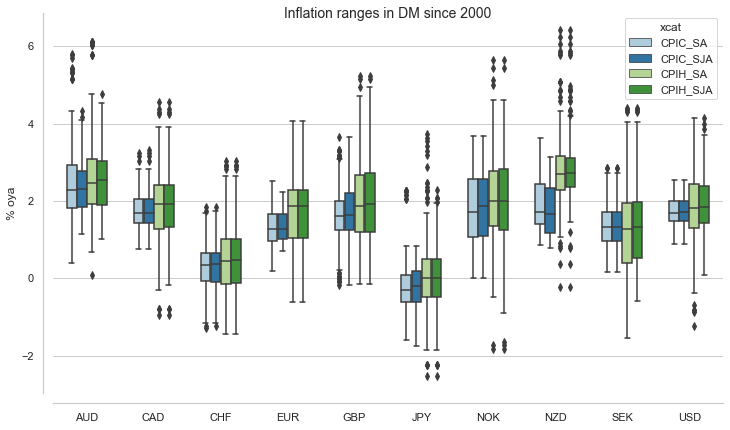

In [41]:
cids_dm = ['AUD', 'CAD', 'CHF', 'EUR', 'GBP', 'JPY', 'NOK', 'NZD', 'SEK', 'USD']
sns.set(style="whitegrid", palette="Paired", rc={'figure.figsize':(12, 7)})  # set axis plot size
filt1 = dfm_lvp['xcat'].isin(['CPIH_SA', 'CPIC_SA', 'CPIH_SJA', 'CPIC_SJA'])
filt2 = dfm_lvp['cross_section'].isin(cids_dm)
g = sns.boxplot(data=dfm_lvp[filt1 & filt2],
            y="value", x="cross_section", hue="xcat",
            width=0.6)
sns.despine(offset=10, trim=False)
g.set(xlabel='', ylabel='% oya')
g.set_title('Inflation ranges in DM since 2000', y = 0.97, fontsize=14)
plt.show()

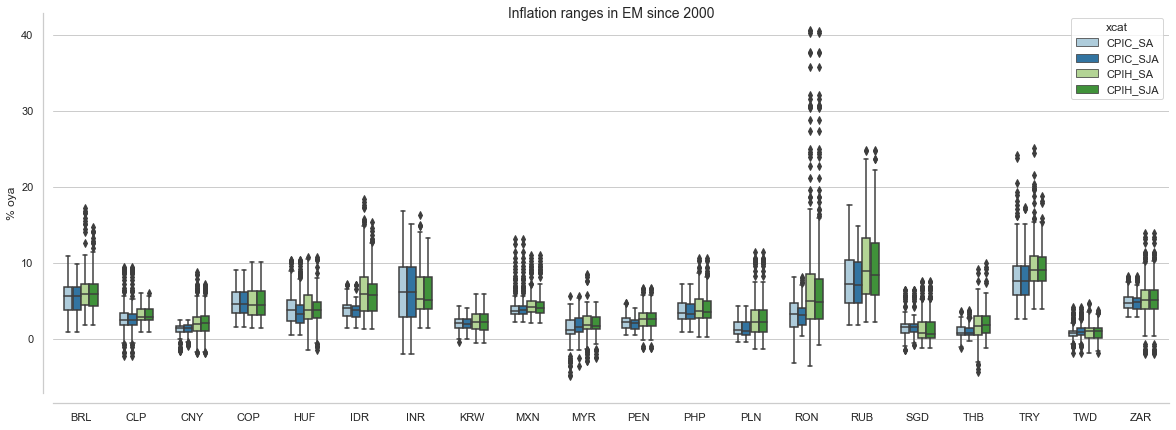

In [42]:
sns.set(style="whitegrid", palette="Paired", rc={'figure.figsize':(20, 7)})  # set axis plot size
g = sns.boxplot(data=dfm_lvp[filt1 & ~filt2],
            y="value", x="cross_section", hue="xcat",
            width=0.6)
sns.despine(offset=10, trim=False)
g.set(xlabel='', ylabel='% oya')
g.set_title('Inflation ranges in EM since 2000', y = 0.97, fontsize=14)
plt.show()

### Impact  of jump adjustment

In [43]:
dfm_xcat = pd.pivot_table(dfm_lvp, values='value', index=('cross_section', 'observation_date'), columns='xcat')

In [44]:
dfm_xcat['CPIH_JAE'] = (dfm_xcat['CPIH_SJA'] - dfm_xcat['CPIH_SA']).round(2)
dfm_xcat['CPIC_JAE'] = (dfm_xcat['CPIC_SJA'] - dfm_xcat['CPIC_SA']).round(2)

In [45]:
dfm_xs = dfm_xcat.stack().reset_index().sort_values(['cross_section', 'xcat'])
dfm_xs = dfm_xs.rename(columns={0: 'value'})
dfm_xs.head()

cross_section observation_date      xcat  value
6            AUD       2000-01-31  CPIC_JAE    0.0
13           AUD       2000-02-29  CPIC_JAE   -0.0
20           AUD       2000-03-31  CPIC_JAE   -0.0
27           AUD       2000-04-30  CPIC_JAE   -0.0
34           AUD       2000-05-31  CPIC_JAE   -0.0

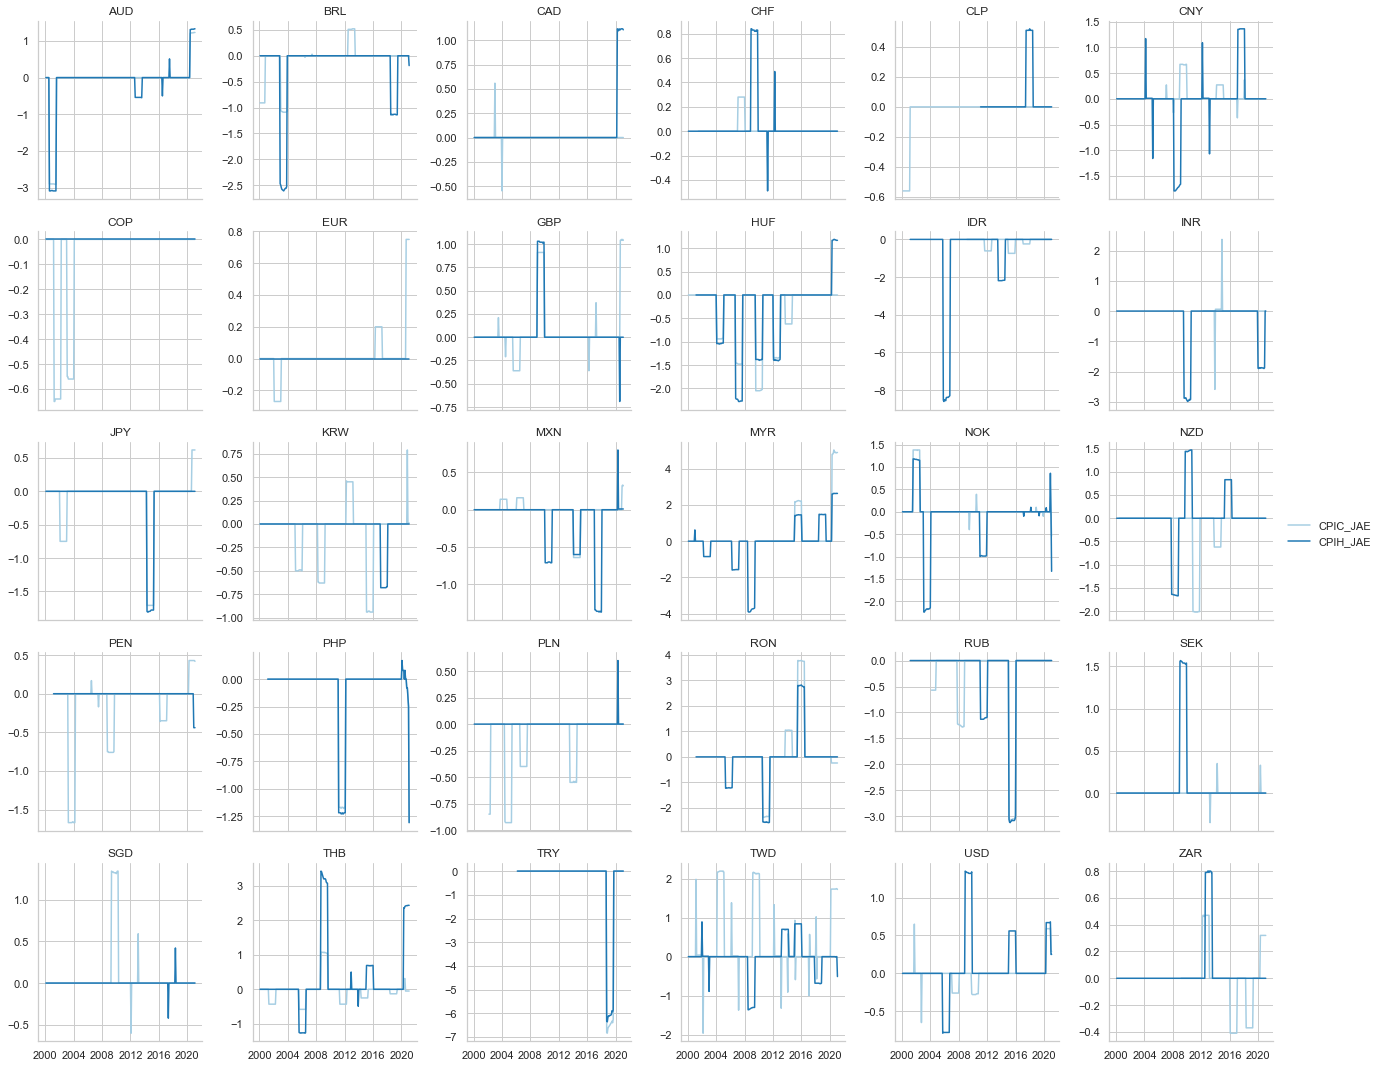

In [46]:
filt = dfm_xs['xcat'].isin(['CPIH_JAE', 'CPIC_JAE'])
g = sns.FacetGrid(dfm_xs[filt], col='cross_section', col_wrap = 6, sharey=False)
g.map_dataframe(sns.lineplot, x='observation_date', y='value', hue ='xcat')
g.set_titles(col_template='{col_name}')
g.add_legend() 

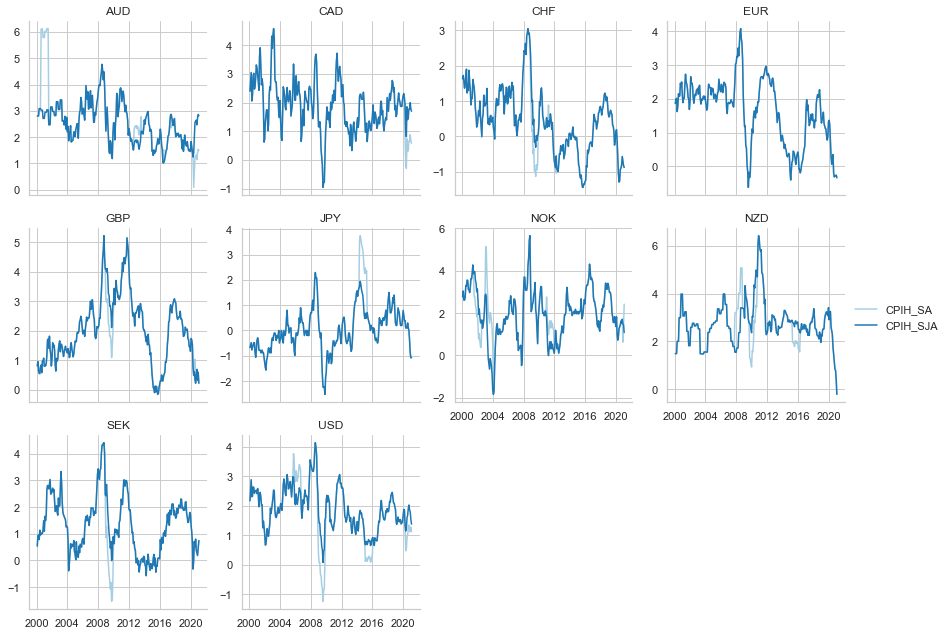

In [47]:
cids_dm = ['AUD', 'CAD', 'CHF', 'EUR', 'GBP', 'JPY', 'NOK', 'NZD', 'SEK', 'USD']
filt1 = dfm_xs['xcat'].isin(['CPIH_SJA', 'CPIH_SA'])
filt2 = dfm_xs['cross_section'].isin(cids_dm) 
g = sns.FacetGrid(dfm_xs[filt1 & filt2], col='cross_section', col_wrap = 4, sharey=False)
g.map_dataframe(sns.lineplot, x='observation_date', y='value', hue ='xcat')
g.set_titles(col_template='{col_name}')
g.add_legend()

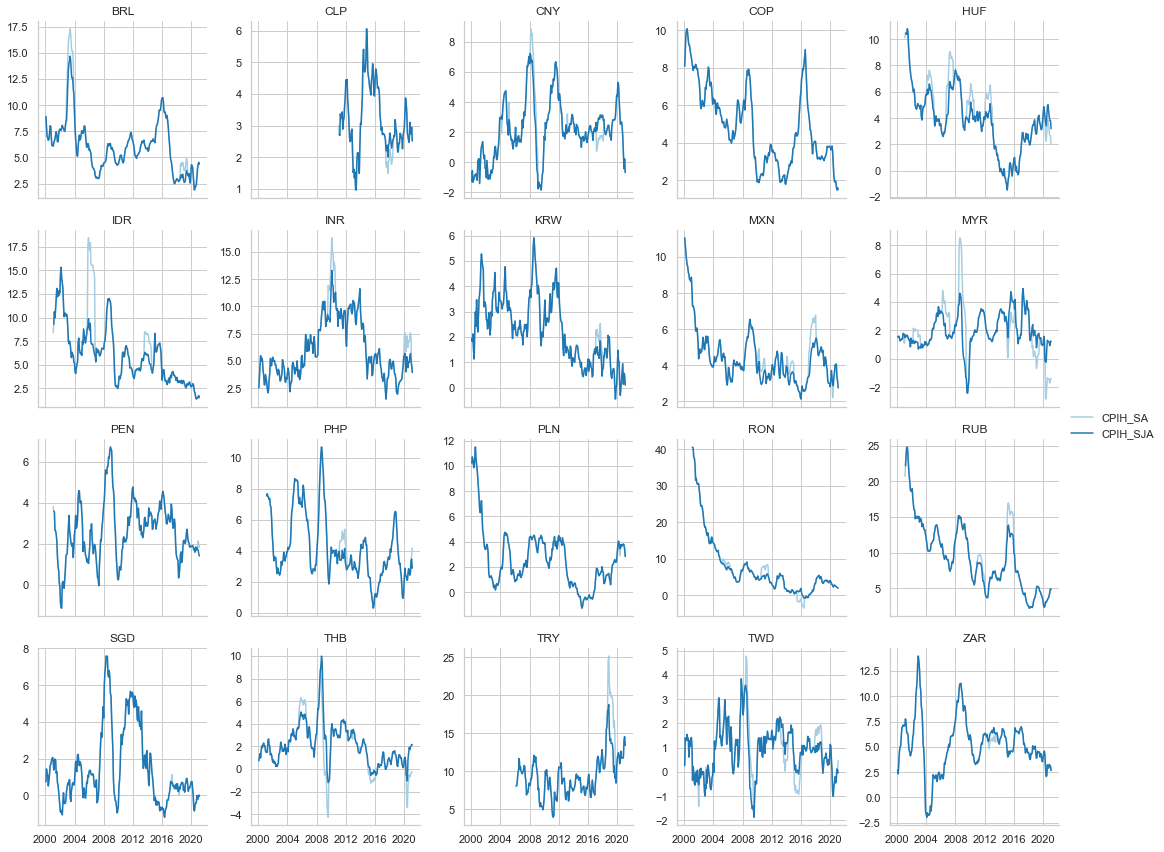

In [48]:
cids_dm = ['AUD', 'CAD', 'CHF', 'EUR', 'GBP', 'JPY', 'NOK', 'NZD', 'SEK', 'USD']
filt1 = dfm_xs['xcat'].isin(['CPIH_SJA', 'CPIH_SA'])
filt2 = dfm_xs['cross_section'].isin(cids_dm) 
g = sns.FacetGrid(dfm_xs[filt1 & ~filt2], col='cross_section', col_wrap = 5, sharey=False)
g.map_dataframe(sns.lineplot, x='observation_date', y='value', hue ='xcat')
g.set_titles(col_template='{col_name}')
g.add_legend()

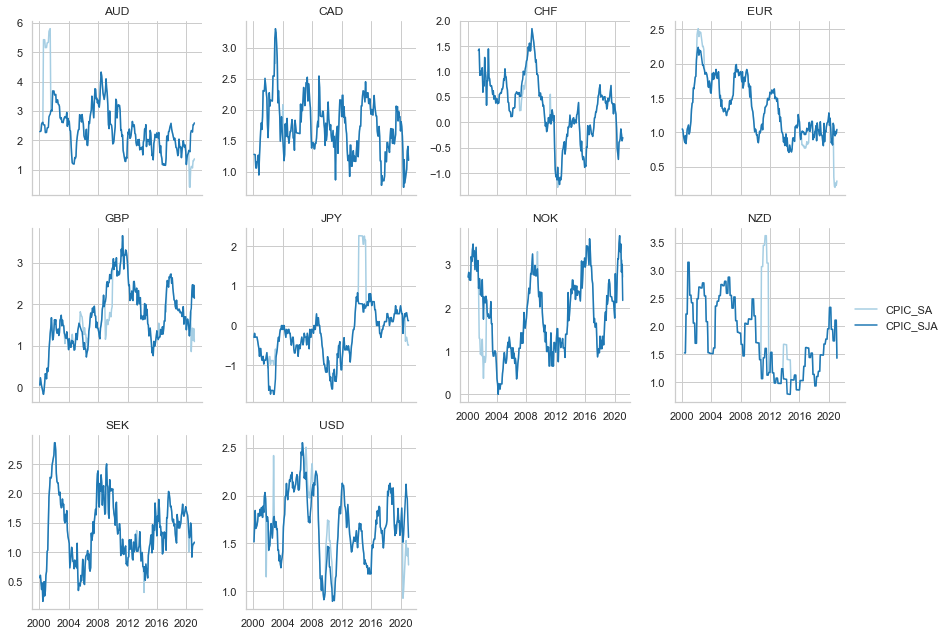

In [49]:
cids_dm = ['AUD', 'CAD', 'CHF', 'EUR', 'GBP', 'JPY', 'NOK', 'NZD', 'SEK', 'USD']
filt1 = dfm_xs['xcat'].isin(['CPIC_SJA', 'CPIC_SA'])
filt2 = dfm_xs['cross_section'].isin(cids_dm) 
g = sns.FacetGrid(dfm_xs[filt1 & filt2], col='cross_section', col_wrap = 4, sharey=False)
g.map_dataframe(sns.lineplot, x='observation_date', y='value', hue ='xcat')
g.set_titles(col_template='{col_name}')
g.add_legend()

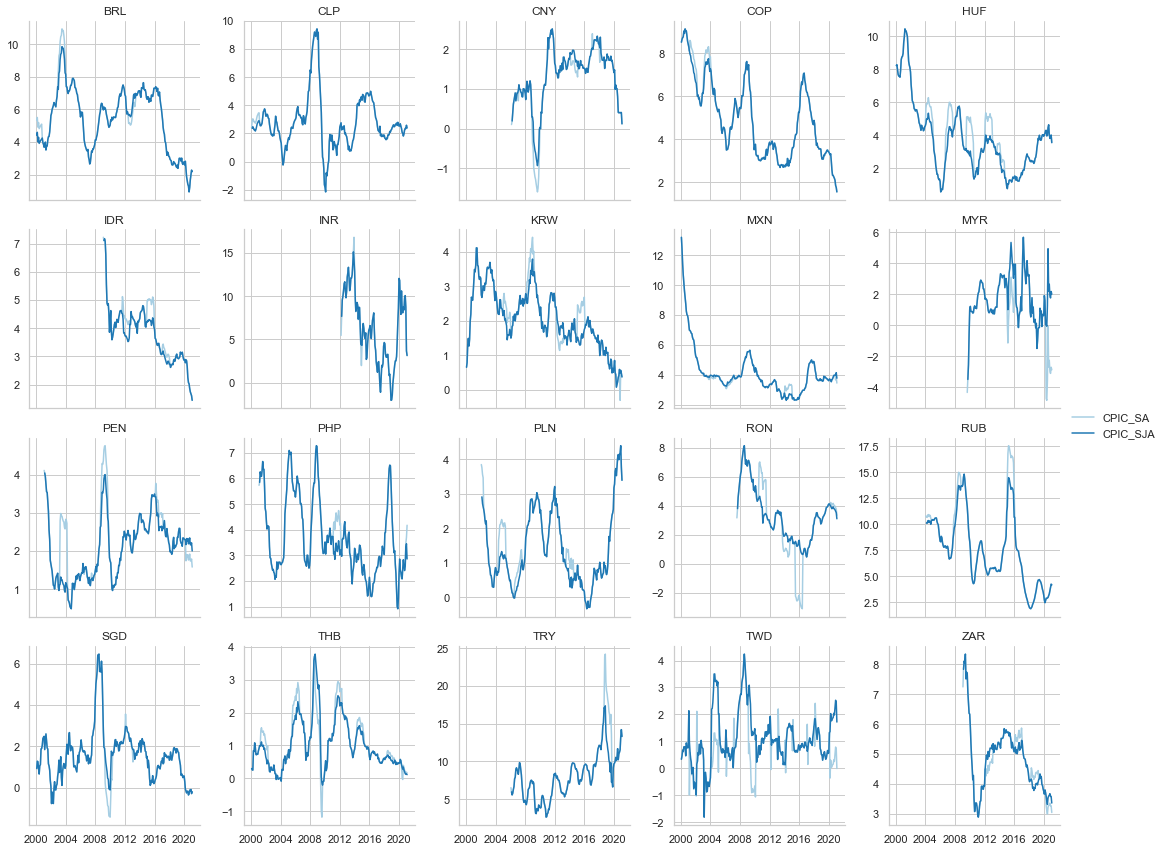

In [50]:
cids_dm = ['AUD', 'CAD', 'CHF', 'EUR', 'GBP', 'JPY', 'NOK', 'NZD', 'SEK', 'USD']
filt1 = dfm_xs['xcat'].isin(['CPIC_SJA', 'CPIC_SA'])
filt2 = dfm_xs['cross_section'].isin(cids_dm) 
g = sns.FacetGrid(dfm_xs[filt1 & ~filt2], col='cross_section', col_wrap = 5, sharey=False)
g.map_dataframe(sns.lineplot, x='observation_date', y='value', hue ='xcat')
g.set_titles(col_template='{col_name}')
g.add_legend()